## **Tutorial: Analysis of the Top Song Genre's on Spotify over 20 years**

#### **An analysis by Giresse Achouakong, Andrey Kuzin, and Karen Herrera Matus**

#### **Final Project Tutorial CMSC 320**

**July 21st, 2020** 

#### **Overview**

Definition of word Genre <br/>
gen·re <br/>
ˈZHänrə <br/>
noun <br/>
noun: genre; plural noun: genres <br/>
a category of artistic composition, as in music or literature, characterized by similarities in form, style, or subject matter. <br/>

As the definition above shows, a music genre is a conventional category that identifies some pieces of music as belonging to a shared tradition or set of conventions. There are many existing categories, some of the most popular being Pop, Hip-hop, Country, Rap and Rock. However, at times it can be heavily influenced by one's own judgment, and may be hard to identify what genre a song falls into or it may appear to potentially fit into multiple categories. Consequently, with many new genre categories developing over the past 10 years such as EDM (Electronic Dance Music), we wanted to explore whether the similarities of the way the songs sounds goes deeper into detectable quantitative musical elements.
<br>
In this tutorial, we will analyze Spotify Top Songs data from 2000 to 2019, available through Kaggle website. With this data, we will merge two different data sets. The first one only covers the top 2010 to 2019 songs, and the second one covers the top the 2000 to 2019 songs. We will begin loading the data and performing exploratory data analysis before we research to train our classification model to identify a song's genre based on certain parameters that could be computed and extracted from a song. Our end goal is to test if we can predict that if a song can be featured in the Top Billboard Charts using specific parameters, to then be used to characterize and classify it uniquely.

#### **Required Tools and Libraries**

For this tutorial, we recommend using Jupyter Notebook as the editor and use Python. <br>
We used the following Python packages:

- `numpy:` this package allows us to implement mathematical and scientific functions
- `pandas:` this package allows us to create data frames
- `matplotlib:` this library is used to create visualizations in Python.
- `sklearn:` this library is used for machine learning features such as regression
- `statmodels:` this module provides statistical models 
- `seaborn:` this library is based on matplotlib and provides a high-level interface for data visualization

The datasets used can be downloaded in the following links:

- Top Songs of 2000's: https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset
- Top Songs of 2010s: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year/data

<br>
<br>
*Note: This tutorial assumes the user already have Jupyter Notebook installed*
<br>

If the user do not have experience on Data Science, we recommend scrolling down to 
**Extra Resources** 
to find documentation on the libraries. These resources can be helpful too for users that have experience on Data Science and want to dive more deeply into the techniques and libraries we used
<br>

#### **Part 1: Data Collection**

The very first stage of the Data cycle is Data Collection, which has the main focus of collecting data to use for exploring your clearly defined research question (as suggested by the name). Data can be collected by web scraping websites through GET requests or one can access already existing datasets in the format of various files from repositories.
We did the later, we formulated a clear question we wanted to explore and then located an existing data set that the Spotify Web API provided. We decided to do this instead of attempting to scrape other sources, because Spotify is considered to be one of the most popular streaming platforms world wide, consequently, we thought that it's data would be more valuable for the analysis process and reaching a accurate conclusion.

In [1]:
#Add all the imports for the libraries specified above
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import statistics
import statsmodels.formula.api as sm
import seaborn as sns


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.weightstats import ttest_ind
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

##### **1.1 Data Scraping and Overview**

The datasets are contained in a comma-separated value file (CSV) which are also located in the GitHub. We use the read_csv function in the pandas module to load the data into a data frame.
<br><br>
The first data frame we will create will be from the dataset *dataset-of-10s* which contains songs from the year 2010 to the year 2019 that were fetched using the Spotify's Web API. While reading the README provided with the data set, we determined what each parameter was. We will not use all the parameters (or columns) in this dataset, nonetheless, here are all the columns provided with a matching description of the parameter it represents:
- `title`: The name of the song
- `artist`: The name of the artist or group for the track
- `top genre`: The song's genre
- `year`: The year in which the song made it to the top billboard count
- `bpm`: The estimate tempo of a track in beats per minute (BPM)
- `nrgy`: Is the measure of intensity and activity. The higher the value, the faster, loud, and energetic the song feels. It ranges from values of 0 to 100, where 100 is very energetic
- `dnce`: Describes how suitable the song is for dancing. It is determined by a combination of musical elements. The values range from 0 (not danceable) to 100 (the most danceable)
- `dB`: Measures the loudness of a track in decibels (dB). Values typically range from -60 to 0 dB
- `live`: Tells you what value of the song was recorded live (like in a concert). The values range from 0 to 100
- `val`: Measure that describes the musical positiveness in a song. The values range from 0 to 100 where 100 is the more positive (happy and cheerful) sounds
- `dur`: How long was the song in seconds
- `acous`: Values range from 0 to 100 where 100 represents high confidence that the song is acoustic
- `spch`: Quality that detects the presence of words spoken/sang in a track. It ranges from values 0 to 100 where 100 will be a song with many words on it. For music in general, the values range from 66 to 33 in average but it can be lower. This is because it is highly unlikely that a song will only have words. A good example of a value closer to 100 would be an audiobook (although this would not be in the music category)
- `pop`: The higher the value, the more popular the song


In [2]:
#Create a dataframe of the songs that were in the Bilboard for the year 2019 in the dataframe named data
top10s_df = pd.read_csv("top10s.csv")
top10s_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


The second data frame we will use is from the dataset *top2000s* which contains the most popular songs in the world from Spotify between the years 2000 and 2019. Our goal using this dataset is to create a more complete dataset which serves as a better embodiment of music, as well as to capture a fuller representation of music genres over the years. We also selected this dataset because it already contained very similar parameters with the earlier dataset we selected, which would serve as a big advantage in the later stages of analysis.
<br><br>
The parameters/columns are the same as above but will have different labels
- `Title`: The name of the song
- `Artist`: The name of the artist or group for the track
- `Top Genre`: The song's genre
- `Year`: The year in which the song was released
- `Beats Per Minute (BPM)`: The estimate tempo of a track in beats per minute (BPM)
- `Energy`: Is the measure of intensity and activity. The higher the value, the faster, loud, and energetic the song feels. It ranges from values of 0 to 100, where 100 is very energetic
- `Danceability`: Describes how suitable the song is for dancing. It is determined by a combination of musical elements. The values range from 0 (not danceable) to 100 (the most danceable)
- `Loudeness (dB)`: Measures the loudness of a track in decibels (dB). Values typically range from -60 to 0 dB
- `Liveness`: Tells you what value of the song was recorded live (like in a concert). The values range from 0 to 100
- `Valence`: Measure that describes the musical positiveness in a song. The values range from 0 to 100 where 100 is the more positive (happy and cheerful) sounds
- `Length (Duration)`: How long was the song in seconds
- `Acousticness`: Values range from 0 to 100 where 100 represents high confidence that the song is acoustic
- `Speechiness`: Quality that detects the presence of words spoken/sang in a track. It ranges from values 0 to 100 where 100 will be a song with many words on it. For music in general, the values range from 66 to 33 in average but it can be lower. This is because it is highly unlikely that a song will only have words. A good example of a value closer to 100 would be an audiobook (although this would not be in the music category)
- `Popularity`: The higher the value, the more popular the song

In [3]:
#Create a dataframe of the songs that were in the Bilboard for the years 2000 to 2019 in the dataframe named data
top2000s_df = pd.read_csv("Spotify-2000.csv")
top2000s_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


##### **1.2 Data Tidying**
The second stage of the Data Cycle is Data Tidying which is basically another way of saying "cleaning up" data, and is often referred to as “pre-processing” stage during which raw data is "cleaned up and organized" for the next stage of Data Processing.
<br/> 
The goal is always to make the data structure easier and more intuitive to work with, consequently, we started by renaming the dataframe columns in both datasets so that the information was corresponding and could be used to interact and perform operations between dataframes in later steps.

In [4]:
#Renaming the columns from top10s_df
top10s_df.rename(columns={"Unnamed: 0":"Index","title":"Title", "artist":"Artist","top genre":"Genre", "year":"Year", "bpm": "BPM", "nrgy": "Energy", "dnce":"Danceability", "live":"Liveness","dB":"Loudness", "val":"Valence", "dur":"Length", "acous":"Acousticness", "spch":"Speechiness", "pop":"Popularity" }, inplace=True)
top10s_df.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
#Renaming the columns from top2000s
top2000s_df.rename(columns = { 'Top Genre' : 'Genre', 'Beats Per Minute (BPM)' : 'BPM', 'Loudness (dB)': 'Loudness' , 'Length (Duration)' : 'Length'}, inplace = True)
top2000s_df

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


#### **Part 2: Data Processing**
<br>
The Data Processing stage of the Data life cycle is in a way a continuation of the previous stage,
Merge the two data sets to create a new dataframe called merged_df. We will use this for our calculations. It will provide us with more data to test in the next parts. We will create an array of dataframes which will contain the top10s_df and the top2000s_df

In [6]:
#Merge the two datasets
frames = [top10s_df,top2000s_df]
merged_df = pd.concat(frames)
merged_df

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


After that, we will drop the unnecessary columns from the new merged database. For this we will use the pandas function .drop() as shown below.

In [7]:
merged_df = merged_df.drop(['Loudness'], axis=1)
merged_df = merged_df.drop(['Liveness'], axis=1)
merged_df.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,221,2,4,78


#### **Part 3: Exploratory Analysis and Data Visualization**
<br>

The main problem with having so many entries is that there must be some information that will not bring any important information to the hypothesis. Because of this, we will first examine all Genres and will create a counter of how many songs from the *merged_df* belong in that Genre. This analysis will give us an insight into which are the most popular Genres. 
<br>
Moreover, we plan to get the mean values of the different parameters in order to have a raw prediction of songs that can potentially become popular in the future.

In [8]:
#We sort the values in the merge_df by "Genre" using the .sort_values() method 
merged_df = merged_df.sort_values(by=['Genre'])
#Here we have a list of the genre names and another list holding a corresponding value to that genre times the frequency.
#For example, canadian pop will have a value of 0 and will be on the list twice as that is it's frequency.
temp = merged_df['Genre'].value_counts()
names = merged_df['Genre'].unique()
    
#both lists will store the genres and their respective counts.
temp_list=[]
temp_list2=[]
for i in names:
    temp_list.append(i)
    temp_list2.append(temp[i])


Here we visualize the genres. We want to see if we can use classification methods to accurately depict where a certain song will end up based on its different attributes.
<br> 
We will use a bar graph to show the distribution of genres so we have a better understanding of what our data looks like. Since we want to be able to classify songs by genre, we will also take a look at how they compare with other values.
<br>

Text(0.5, 1.0, 'Songs from the years 2000 to 2019 vs Genre')

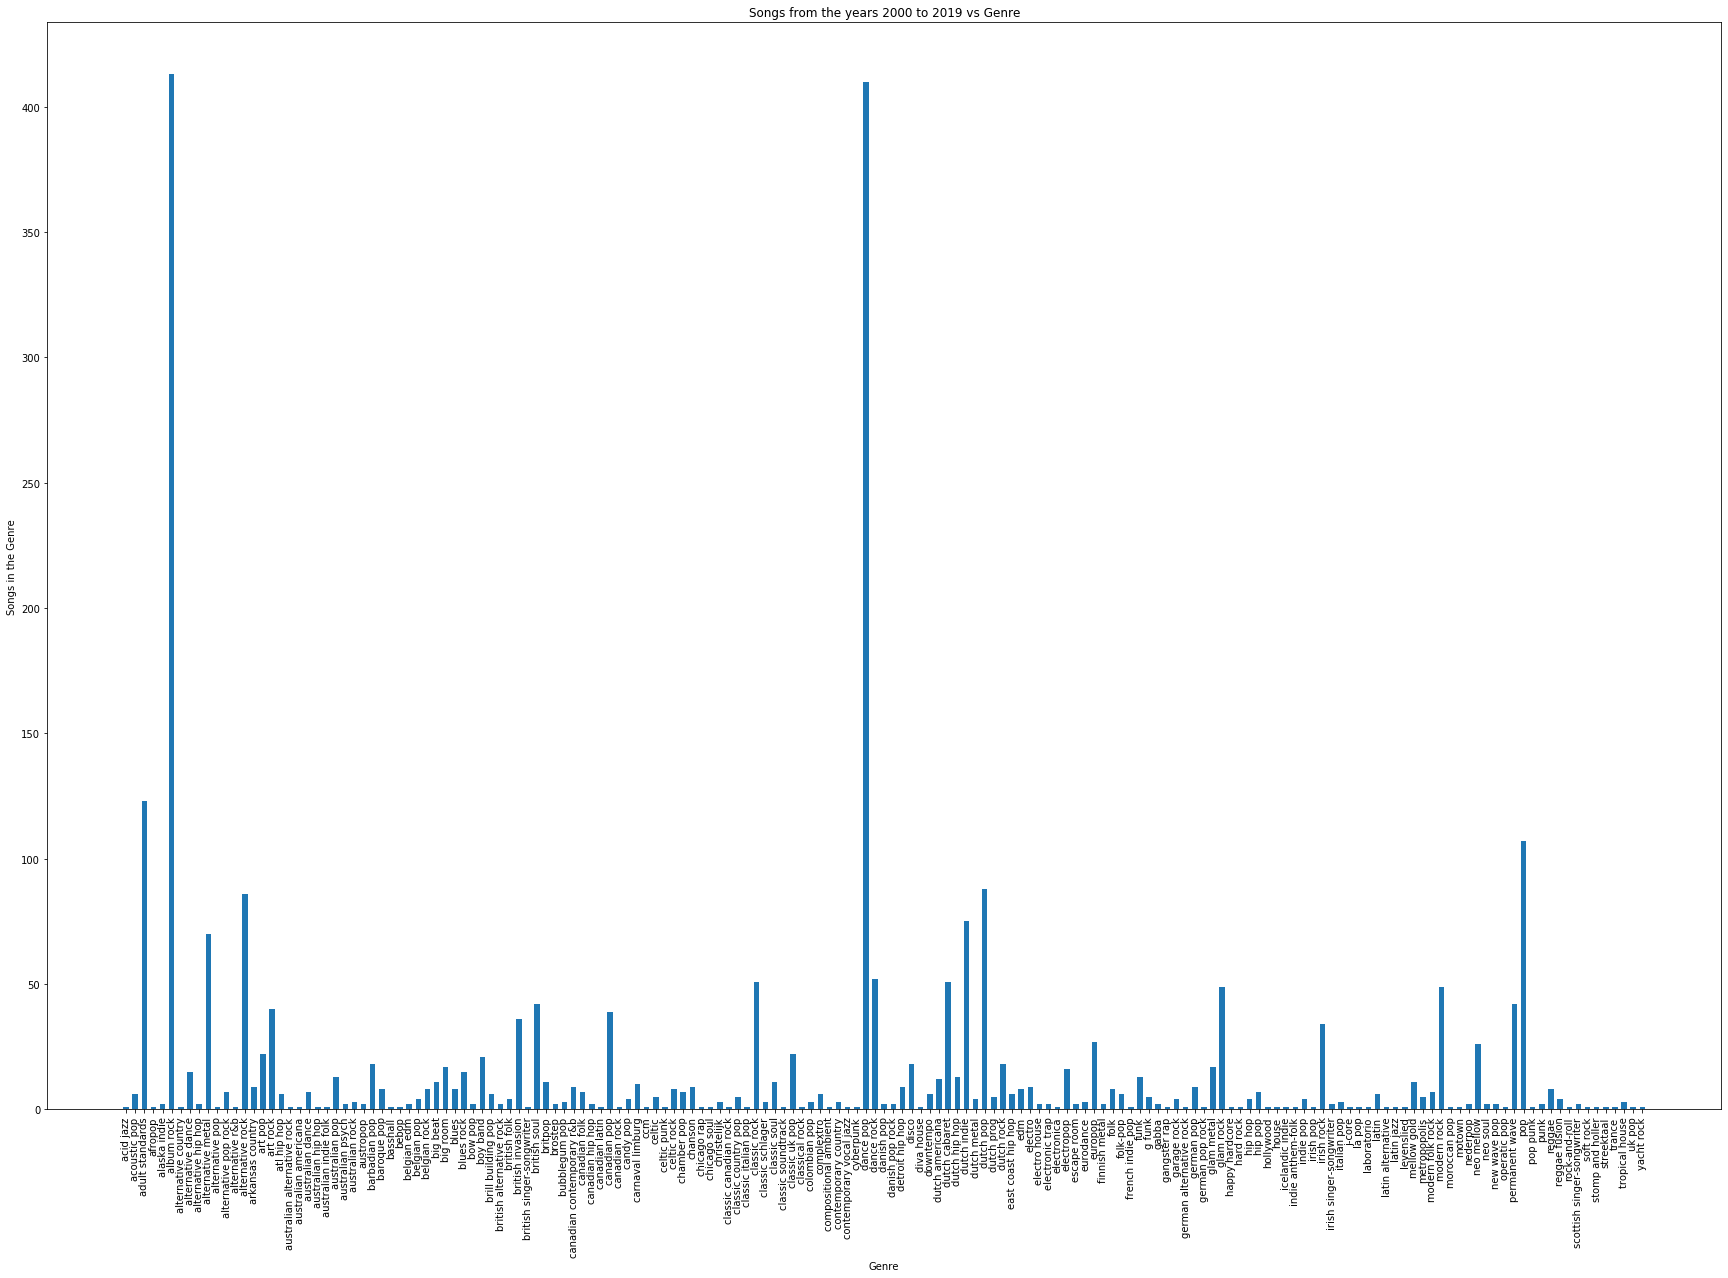

In [9]:
#The creation of the plot
fig =plt.gcf()
fig =fig.set_size_inches(30, 20)
num_list=[]
name_list=[]
for i in range(len(temp_list)):
    for j in range(temp_list2[i]):
        num_list.append(i)
        name_list.append(temp_list[i])
name_list = list(dict.fromkeys(name_list))

#PLoting it
plt.bar(temp_list,temp_list2, width=0.6, bottom=None, align='center', data=None)
plt.xticks(rotation=90)
plt.title("Genre Count")
plt.xlabel('Genre')
plt.ylabel('Songs in the Genre')
plt.title('Songs from the years 2000 to 2019 vs Genre')

Now that we have a clue of which are the most popular genres, we can see in the plot that the four most popular genres are: *Adult Standards*, *Album Rock*, *Dance Pop*, and *Pop*. We can also see that there are some genres that are not very popular and that have a small count. Therefore, our next step in the analysis is to filter out the genres with less than 10 entries. We want to do that in order to keep the ones with big counts to then formulate a proper hypothesis to discover why certain Genres are more popular than others. Also, we will discover which songs will have a greater chance to be in the Top Billboard Charts

In [10]:
#Filtering the genres that have less than 10 entries
merged_df = merged_df.groupby('Genre').filter(lambda g: (len(g)>10))

We will continue by graphing the filtered list of genres vs its count

Text(0.5, 1.0, 'Songs from the years 2000 to 2019 vs Genre')

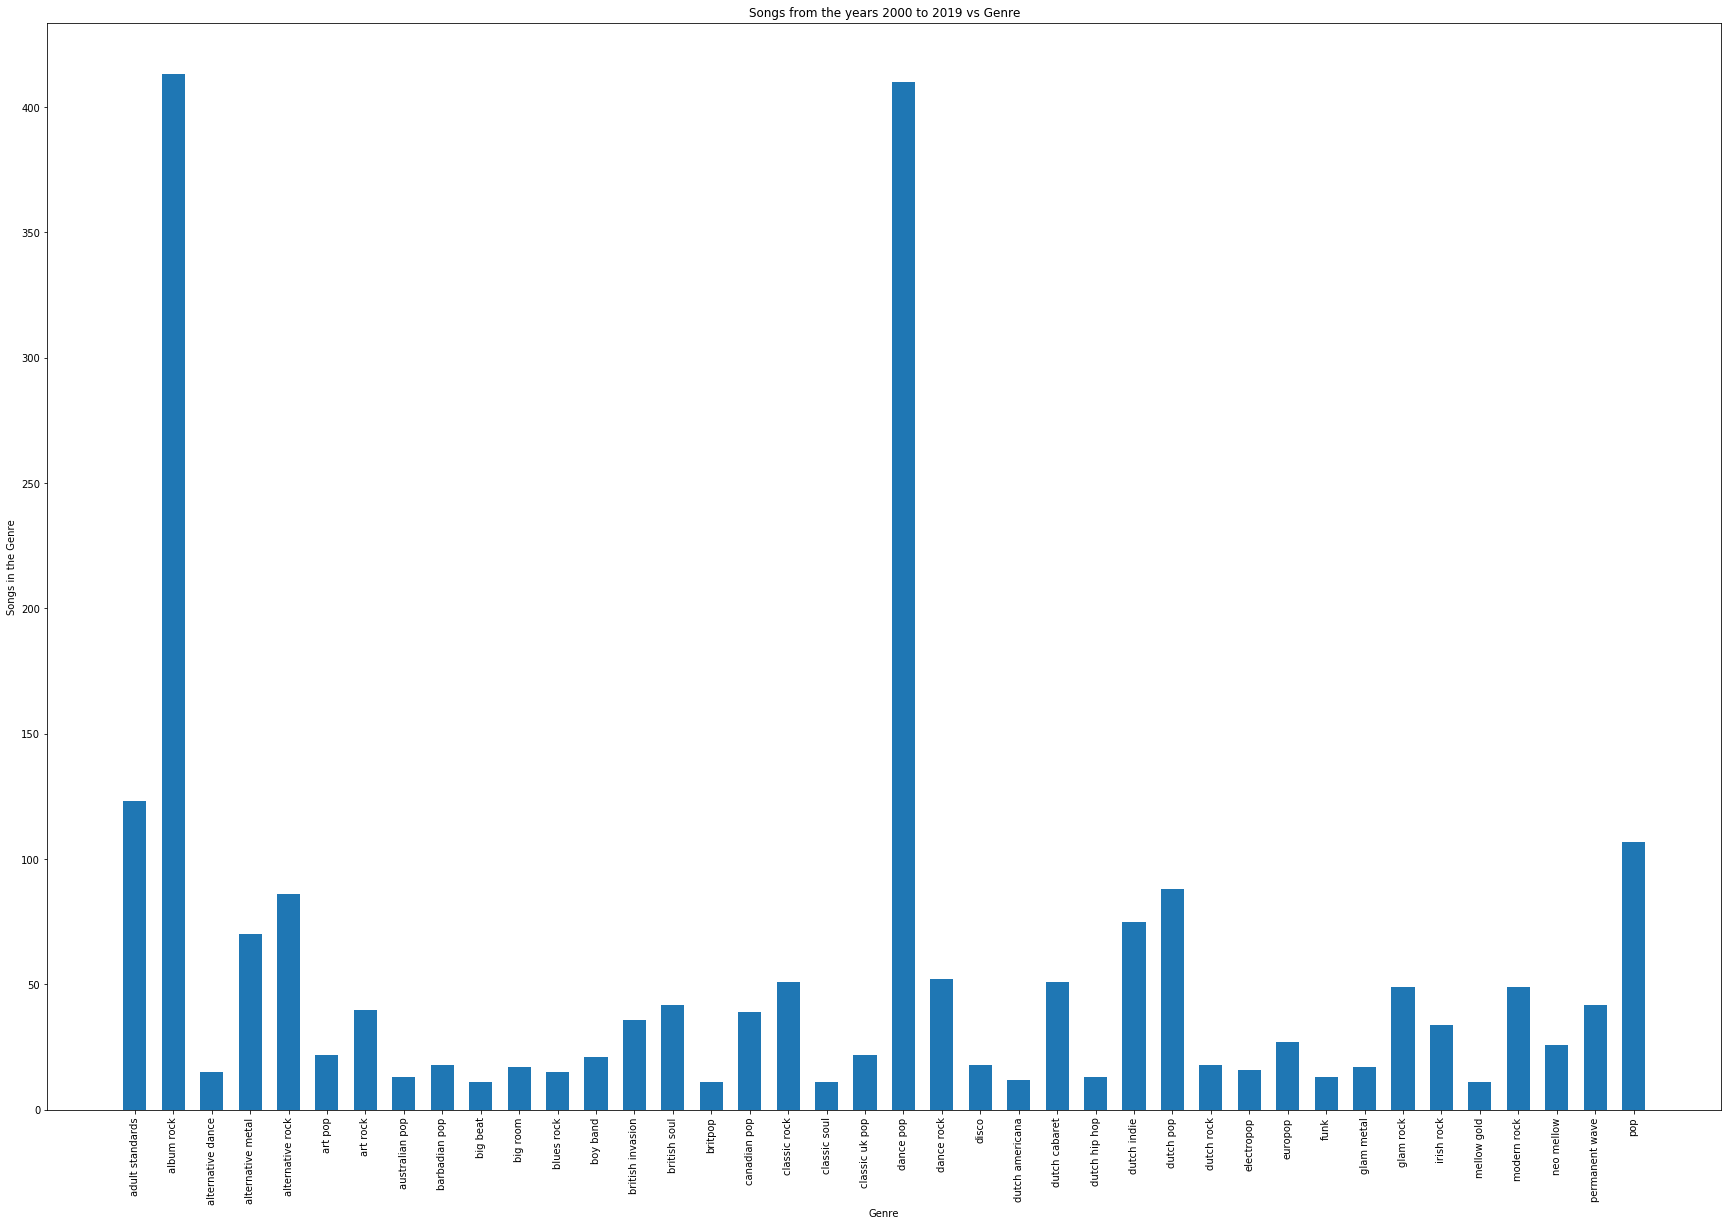

In [11]:
merged_df =merged_df.sort_values(by=['Genre'])
temp = merged_df['Genre'].value_counts()
names = merged_df['Genre'].unique()

fig = plt.gcf()
fig =fig.set_size_inches(30, 20)

#both lists will store the genres and their respective counts.
temp_list=[]
temp_list2=[]
for i in names:
    temp_list.append(i)
    temp_list2.append(temp[i])


#Here we have a list of the genre names and another list holding a corresponding value to that genre times the frequency.
#For example, canadian pop will have a value of 0 and will be on the list twice as that is it's frequency.
num_list=[]
name_list=[]
for i in range(len(temp_list)):
    for j in range(temp_list2[i]):
        num_list.append(i)
        name_list.append(temp_list[i])
name_list = list(dict.fromkeys(name_list))


#Ploting it
plt.bar(temp_list,temp_list2, width=0.6, bottom=None, align='center', data=None)
plt.xticks(rotation=90)
plt.title("Genre Count")
plt.xlabel('Genre')
plt.ylabel('Songs in the Genre')
plt.title('Songs from the years 2000 to 2019 vs Genre')

The new graph looks better. We will continue our analysis using these filtered entries, this way we have sufficient data per Genre to be able to reach an accurate solution.
<br>
To start testing one of our classification methods, we will use the attribute Speechiness to graph each Genre and determine if *Speechiness* is an attribute that can potentially impact if a song is in the Top Songs at Billboard Charts. Remember that Speechiness detects the presence of words in a song. It ranges from 0 to 100. Although we do not expect any song to be near 100 since that value is usually related to Audiobooks.

Text(0.5, 1.0, 'Genre vs Speechines')

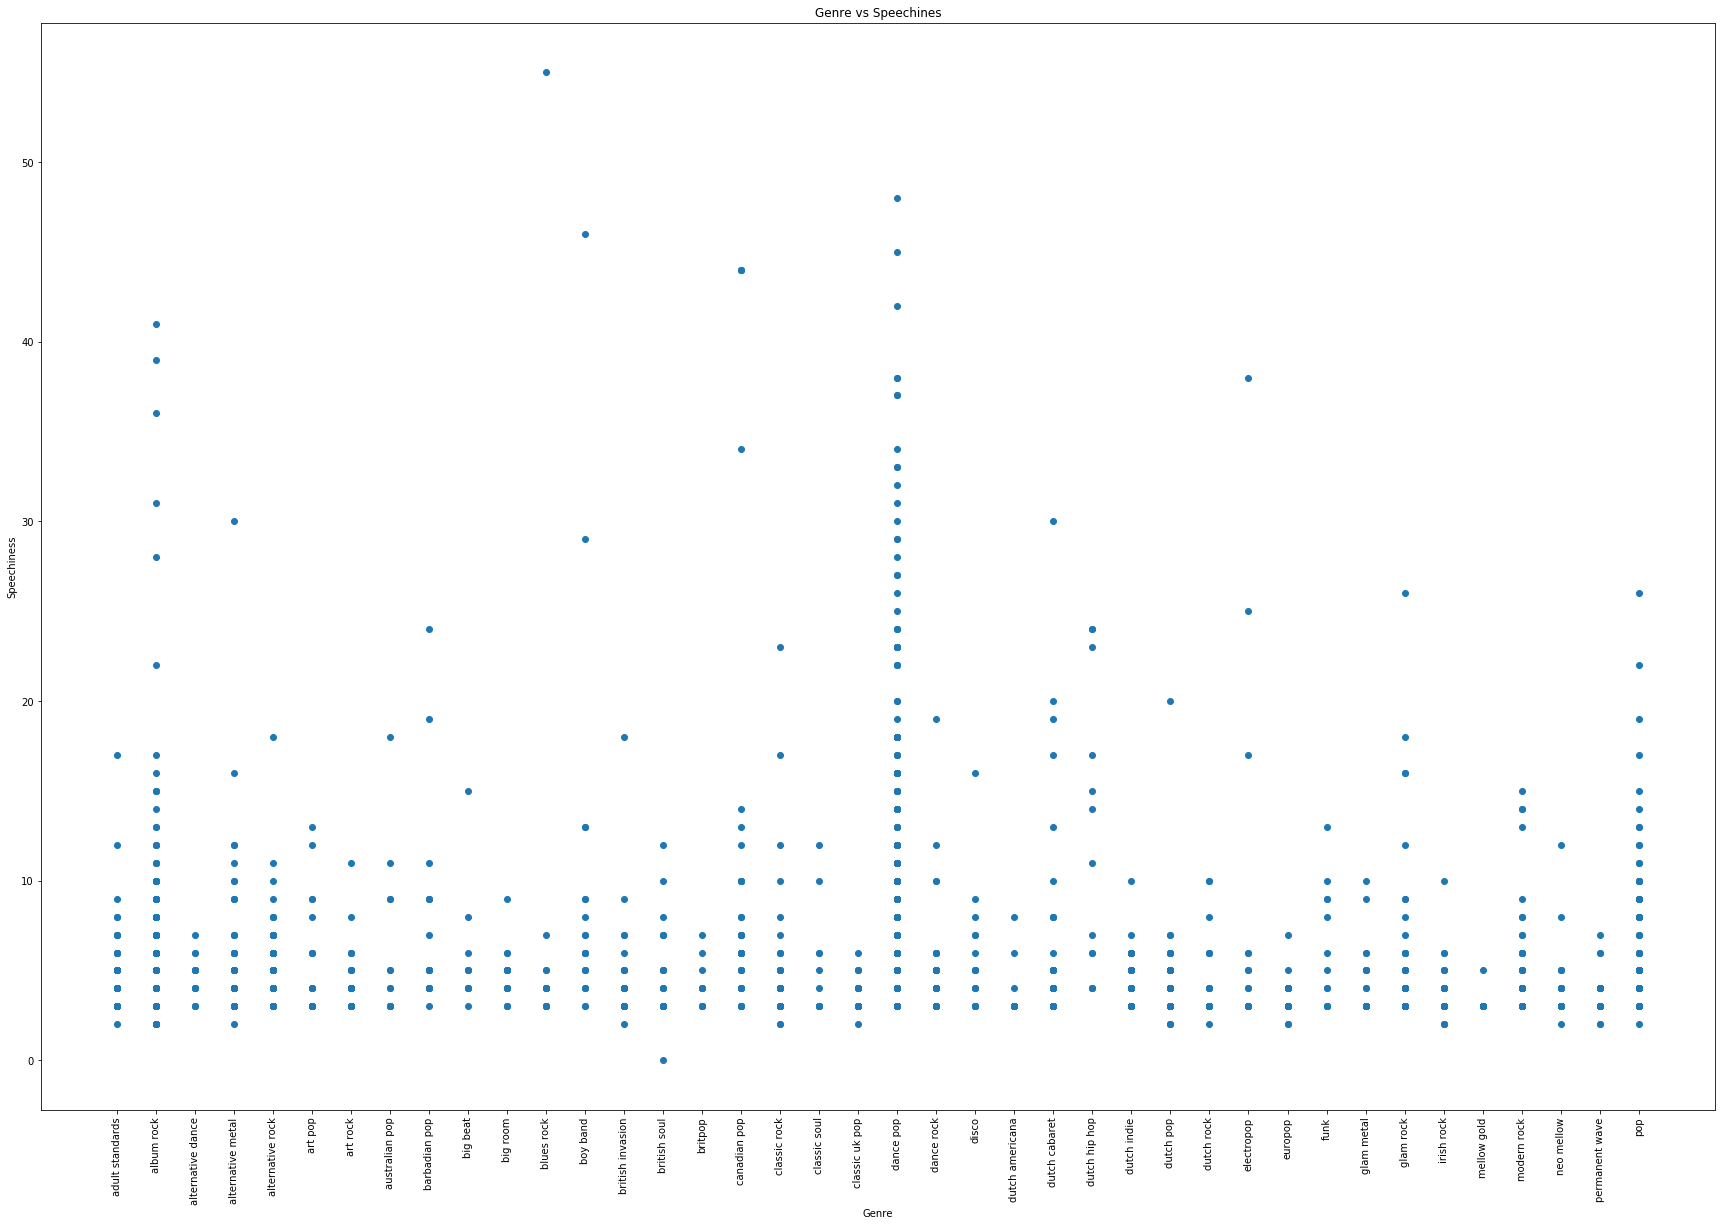

In [12]:
#Graphing the Genres vs The Speechiness Atribute
fig = plt.gcf()
fig =fig.set_size_inches(30, 20)
plt.scatter(merged_df['Genre'], merged_df['Speechiness'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Speechiness')
plt.title('Genre vs Speechines')

<br>
We will determine the mean value for Speechiness of all the songs in the dataset to have a threshold for future predictions.

In [13]:
mean_speechiness = merged_df['Speechiness'].mean()
print("The mean value for speechiness is:")
print(mean_speechiness)

The mean value for speechiness is:
5.595281306715064


**COMMENT:**
In the two plots above, we notice an interesting trend. The first plot that represents "Song Count in each Genre" we immediately identify that there are two categories that display very high frequencies, which are 'Album Rock' and 'Dance Pop'. With a count of almost 400 songs per category it suggests that those two genres are the most listened too, in other words, most popular. Additionally, the next plot that we made was the attribute "Speechiness vs. Genre", we wanted to investigate if there was a distinct relationship between any given parameter and genre. So we started with "Speechiness", however, we did not notice a strong relationship, instead we found that the two graphs looked very similar, replicating the display of the pattern. Consequently, our next step, as suggested by the plots, will be to explore whether Speechiness and the Popularity of a song had a correlation, which we tested for next.

Text(0.5, 1.0, 'Speechiness vs. Popularity')

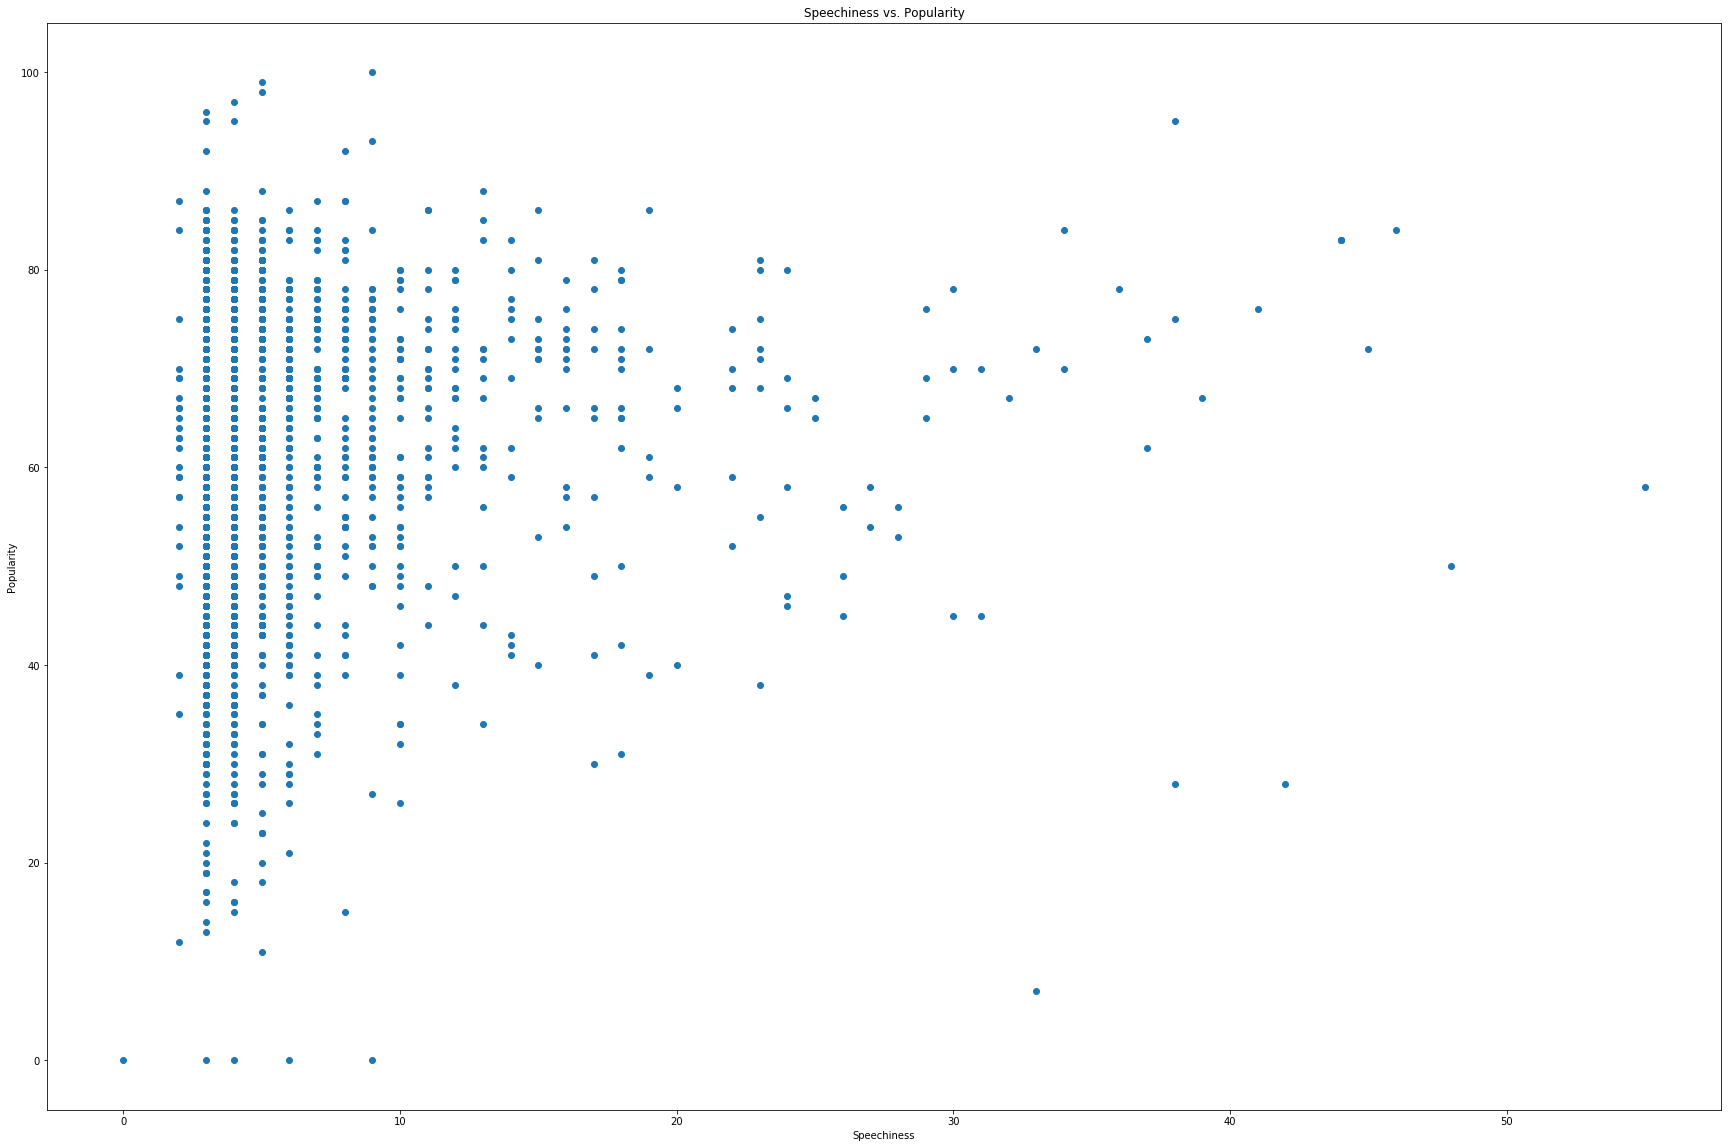

In [14]:
#Plot Speechiness vs Popularity attributes
fig = plt.gcf()
fig = fig.set_size_inches(30, 20)
plt.scatter(merged_df['Speechiness'], merged_df['Popularity'])
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.title('Speechiness vs. Popularity')

Text(0.5, 1.0, 'Speechiness vs. Popularity')

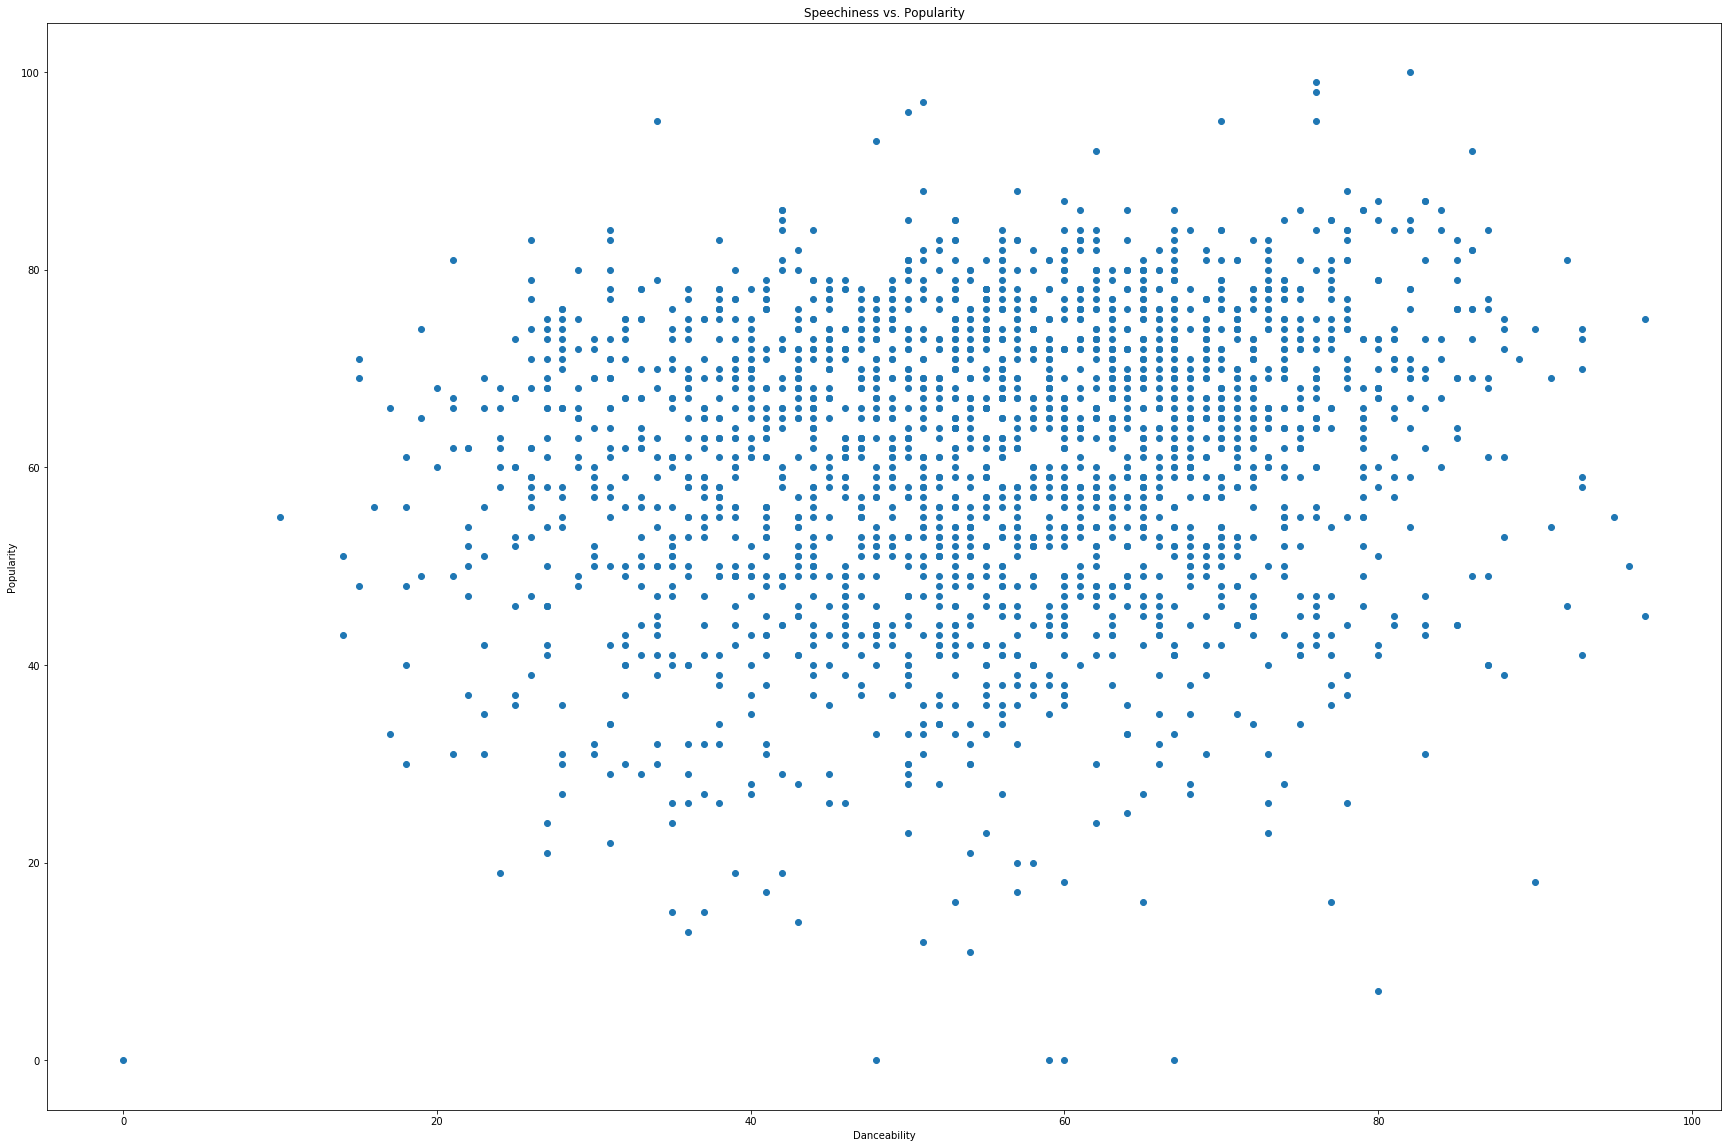

In [15]:
#Plot Speechiness vs Popularity attributes
fig = plt.gcf()
fig = fig.set_size_inches(30, 20)
plt.scatter(merged_df['Danceability'], merged_df['Popularity'])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Speechiness vs. Popularity')

After looking at the graph, we can start constructing a hypothesis to discover which songs have a better chance to reach the Billboard Charts. We can analyze that a song tends to be more popular if it has relatively less words. We have to differenciate the two results above since it can get confusing. The Genre vs Speechiness graph showed us the level of Speechiness that a song has in a specific genre. We can see that in our two most popular genres (Album Rock and Dance Pop). There is a specific variance of Speechiness. However, it seems to have a general cluster in the lower y-axis. Meaning, most of those songs have a lower Speechiness value.
<br>
In the Speechiness vs Popularity Graph, we can see that no matter the Genre, if a song has less Speechiness value, it is more likely to be more popular and to ultimately be featured in the Billboard Chart.
<br><br>
Our hypothesis is taking a better shape. So now we want to test for Genre versus Popularity of each song. This will help us know if our hypothesis so far can be supported with more results.

Text(0.5, 1.0, 'Genre vs Popularity')

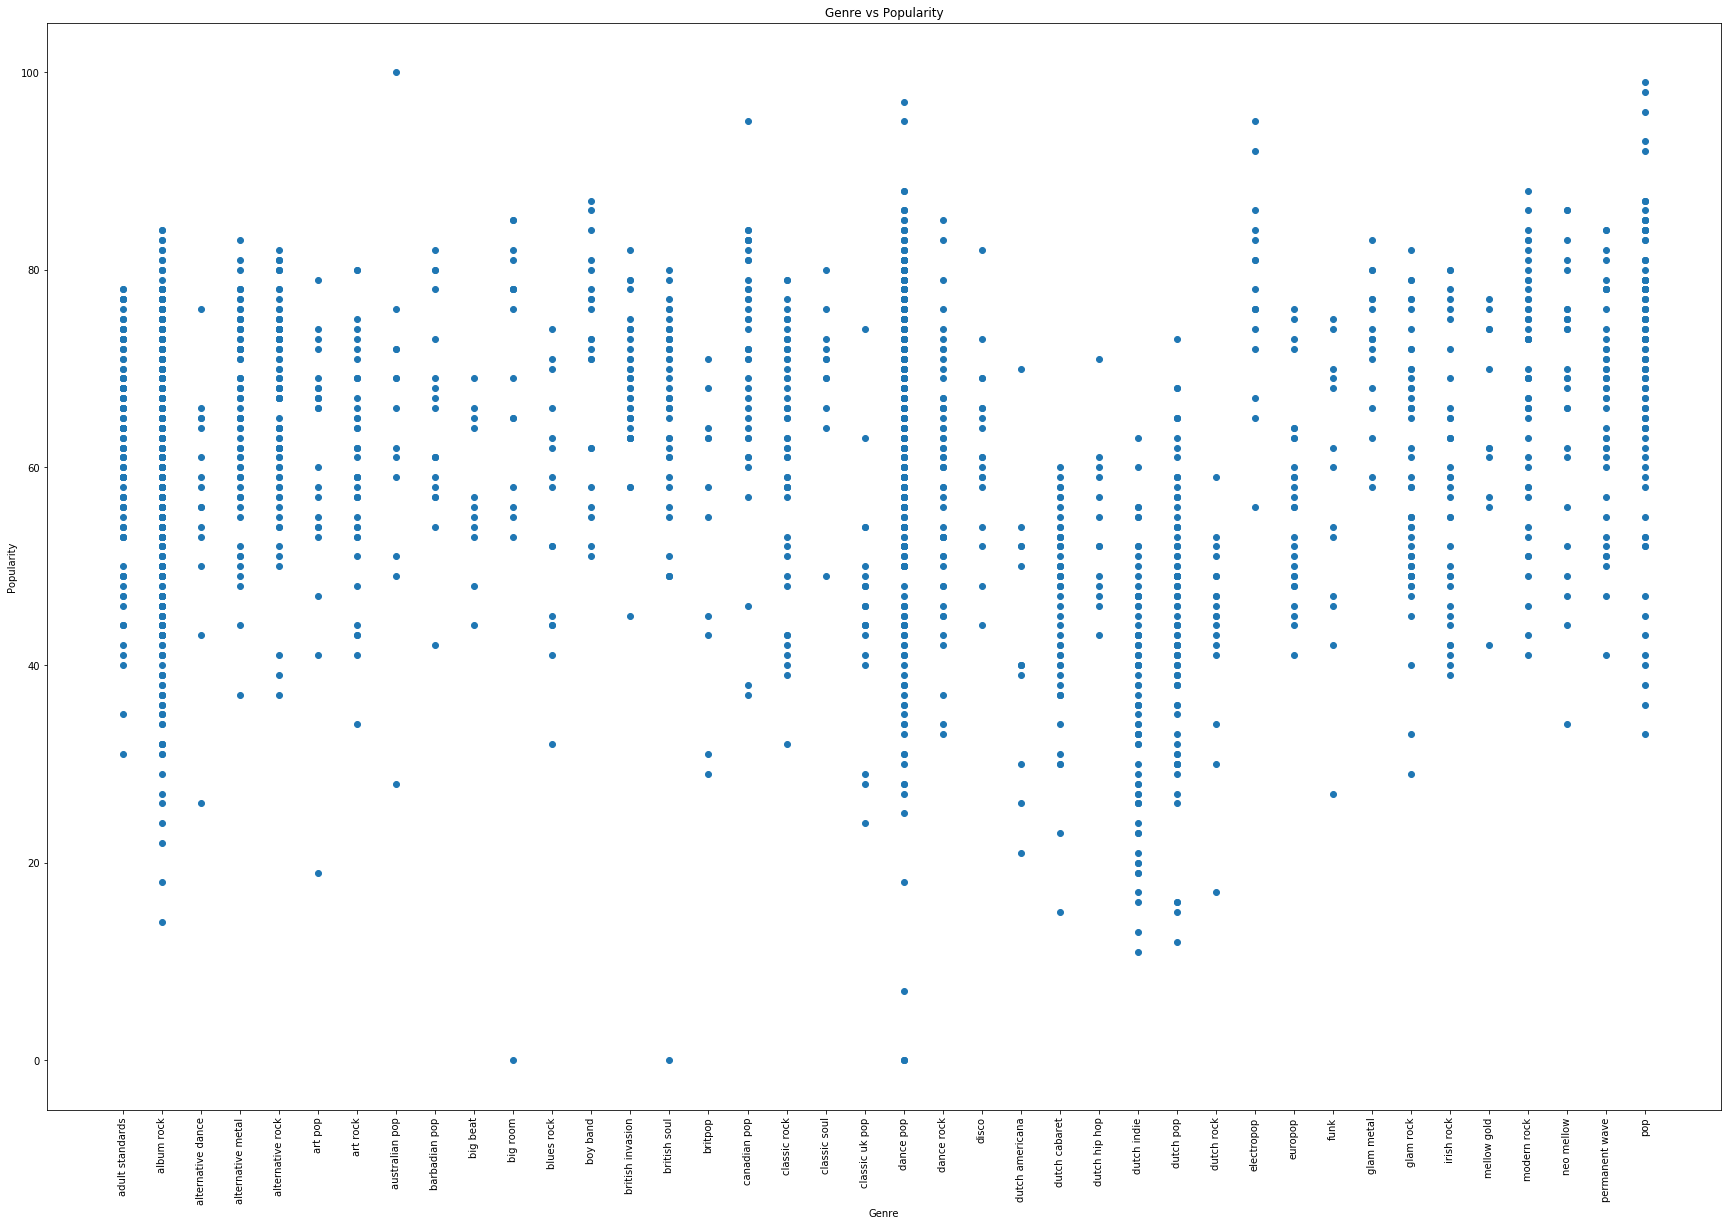

In [16]:
#Graphing the Genres vs The Popularity Atribute
fig = plt.gcf()
fig =fig.set_size_inches(30, 20)
plt.scatter(merged_df['Genre'], merged_df['Popularity'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Genre vs Popularity')

<br>
We will determine the mean value for Popularity of all the songs in the dataset in order to have a threshold for future predictions and to support our future hypothesis.

In [17]:
mean_popularity = merged_df['Popularity'].mean()
print("The mean value for popularity is:")
print(mean_popularity)

The mean value for popularity is:
61.383393829401086


By looking at the new graph we can see that there are bigger clusters for the Genres that have more songs present on the Billboard Charts, and we can see that the song's popularity.

Text(0.5, 1.0, 'Genre vs Beats Per Minute')

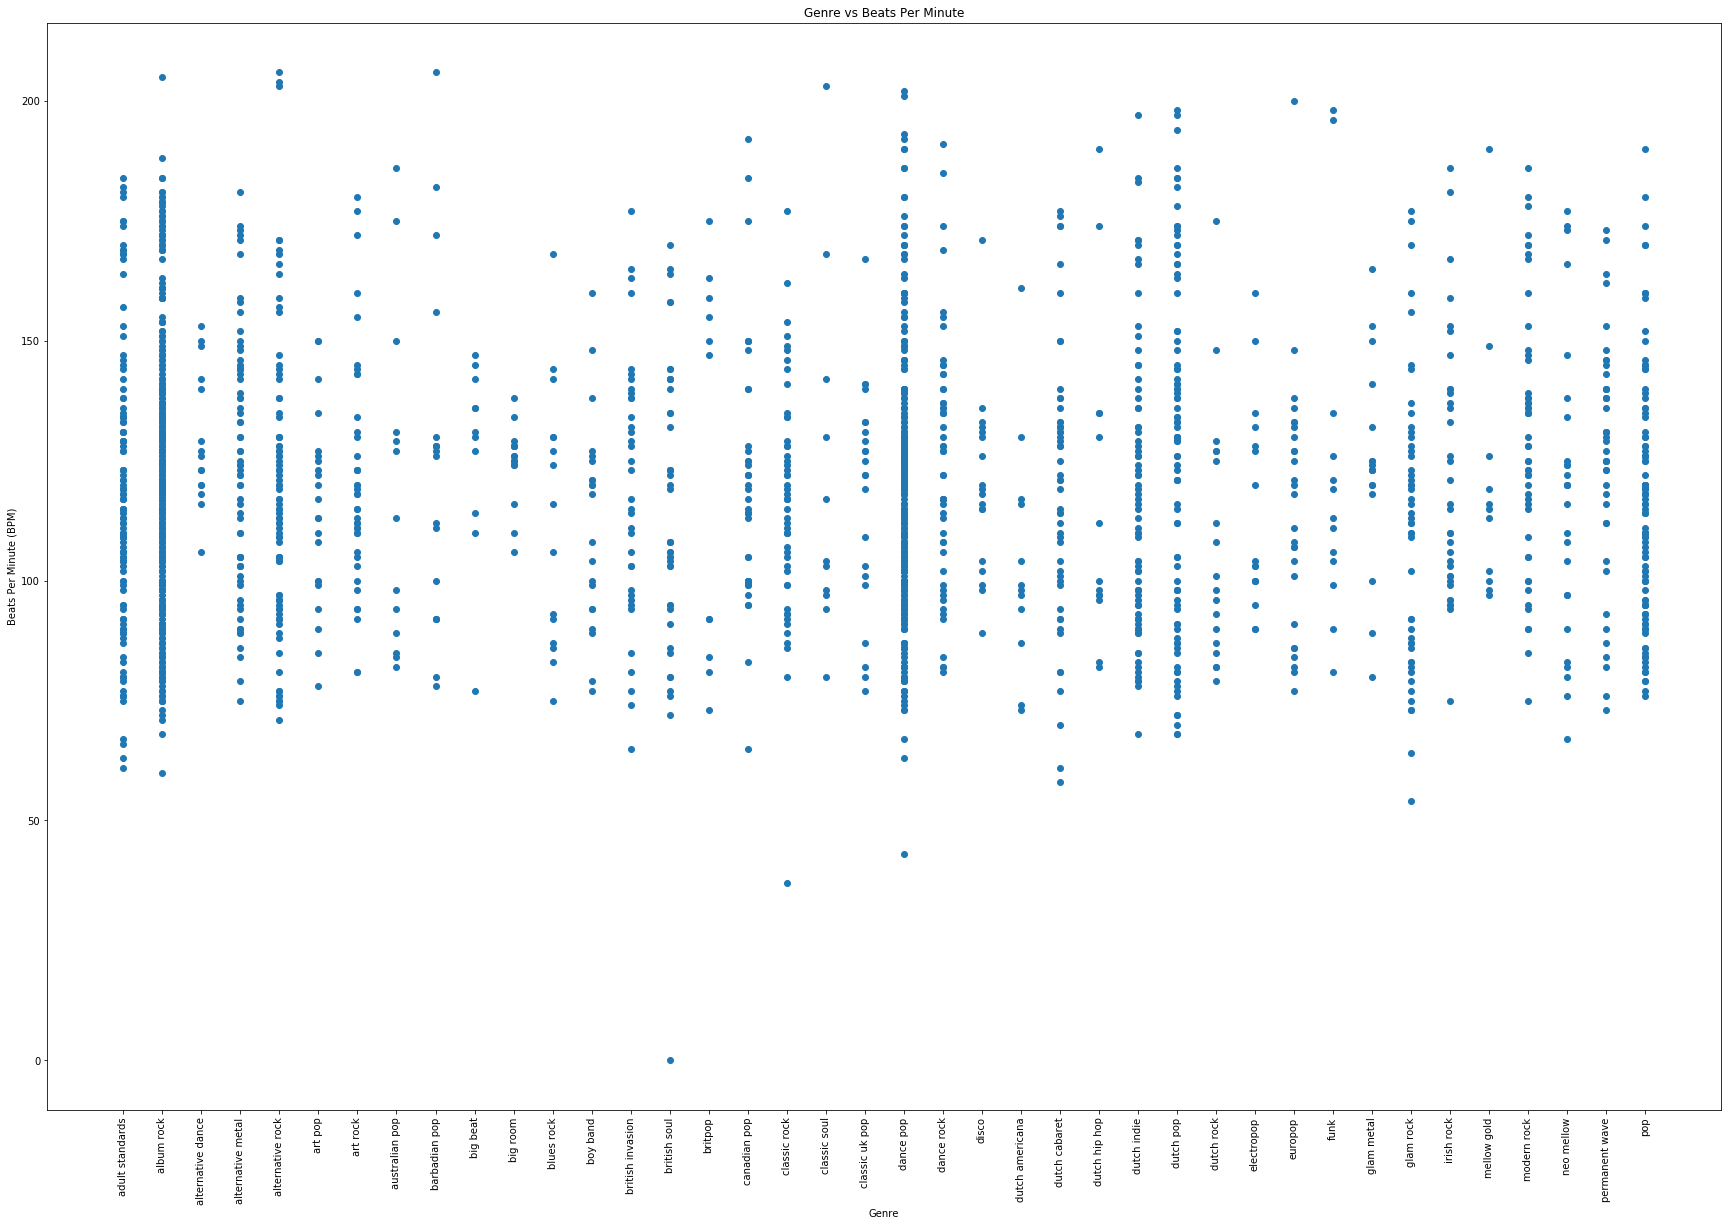

In [18]:
#Graphing the Genres vs The Beats Per Minute Atribute
fig = plt.gcf()
fig =fig.set_size_inches(30, 20)
plt.scatter(merged_df['Genre'], merged_df['BPM'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Beats Per Minute (BPM)')
plt.title('Genre vs Beats Per Minute')

<br>
We will determine the mean value for Beats Per Minute of all the songs in the dataset in order to have a threshold for future predictions and to support our future hypothesis.

In [19]:
mean_bpm = merged_df['BPM'].mean()
print("The mean value for Beats Per Minute is:")
print(mean_bpm)

The mean value for Beats Per Minute is:
119.87341197822141


Text(0.5, 1.0, 'Genre vs Danceability')

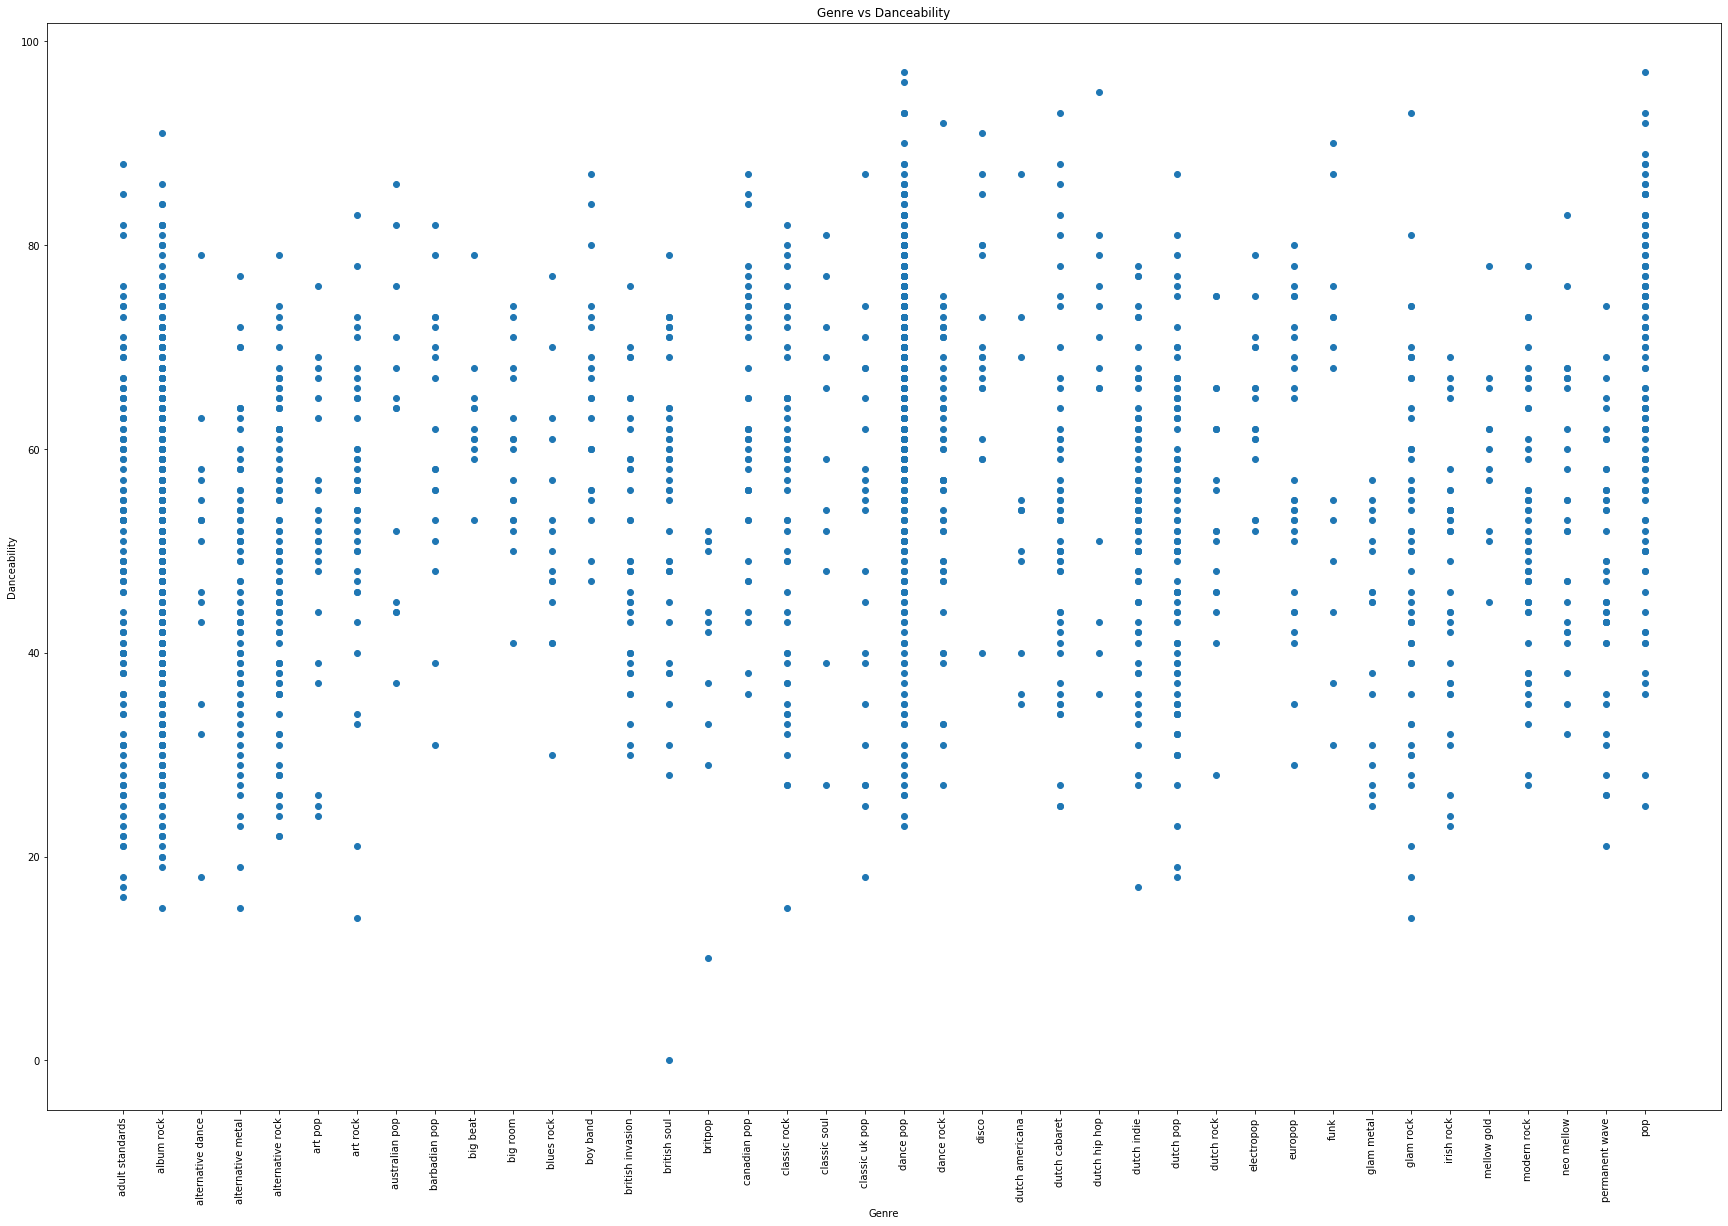

In [20]:
#Graphing the Genres vs The Danceability Atribute
fig = plt.gcf()
fig =fig.set_size_inches(30, 20)
plt.scatter(merged_df['Genre'], merged_df['Danceability'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Genre vs Danceability')

<br>
We will determine the mean value for Danceability of all the songs in the dataset in order to have a threshold for future predictions and to support our future hypothesis.

In [21]:
mean_dance = merged_df['BPM'].mean()
print("The mean value for Beats Per Minute is:")
print(mean_dance)

The mean value for Beats Per Minute is:
119.87341197822141


Text(0.5, 1.0, 'Genre vs Valence')

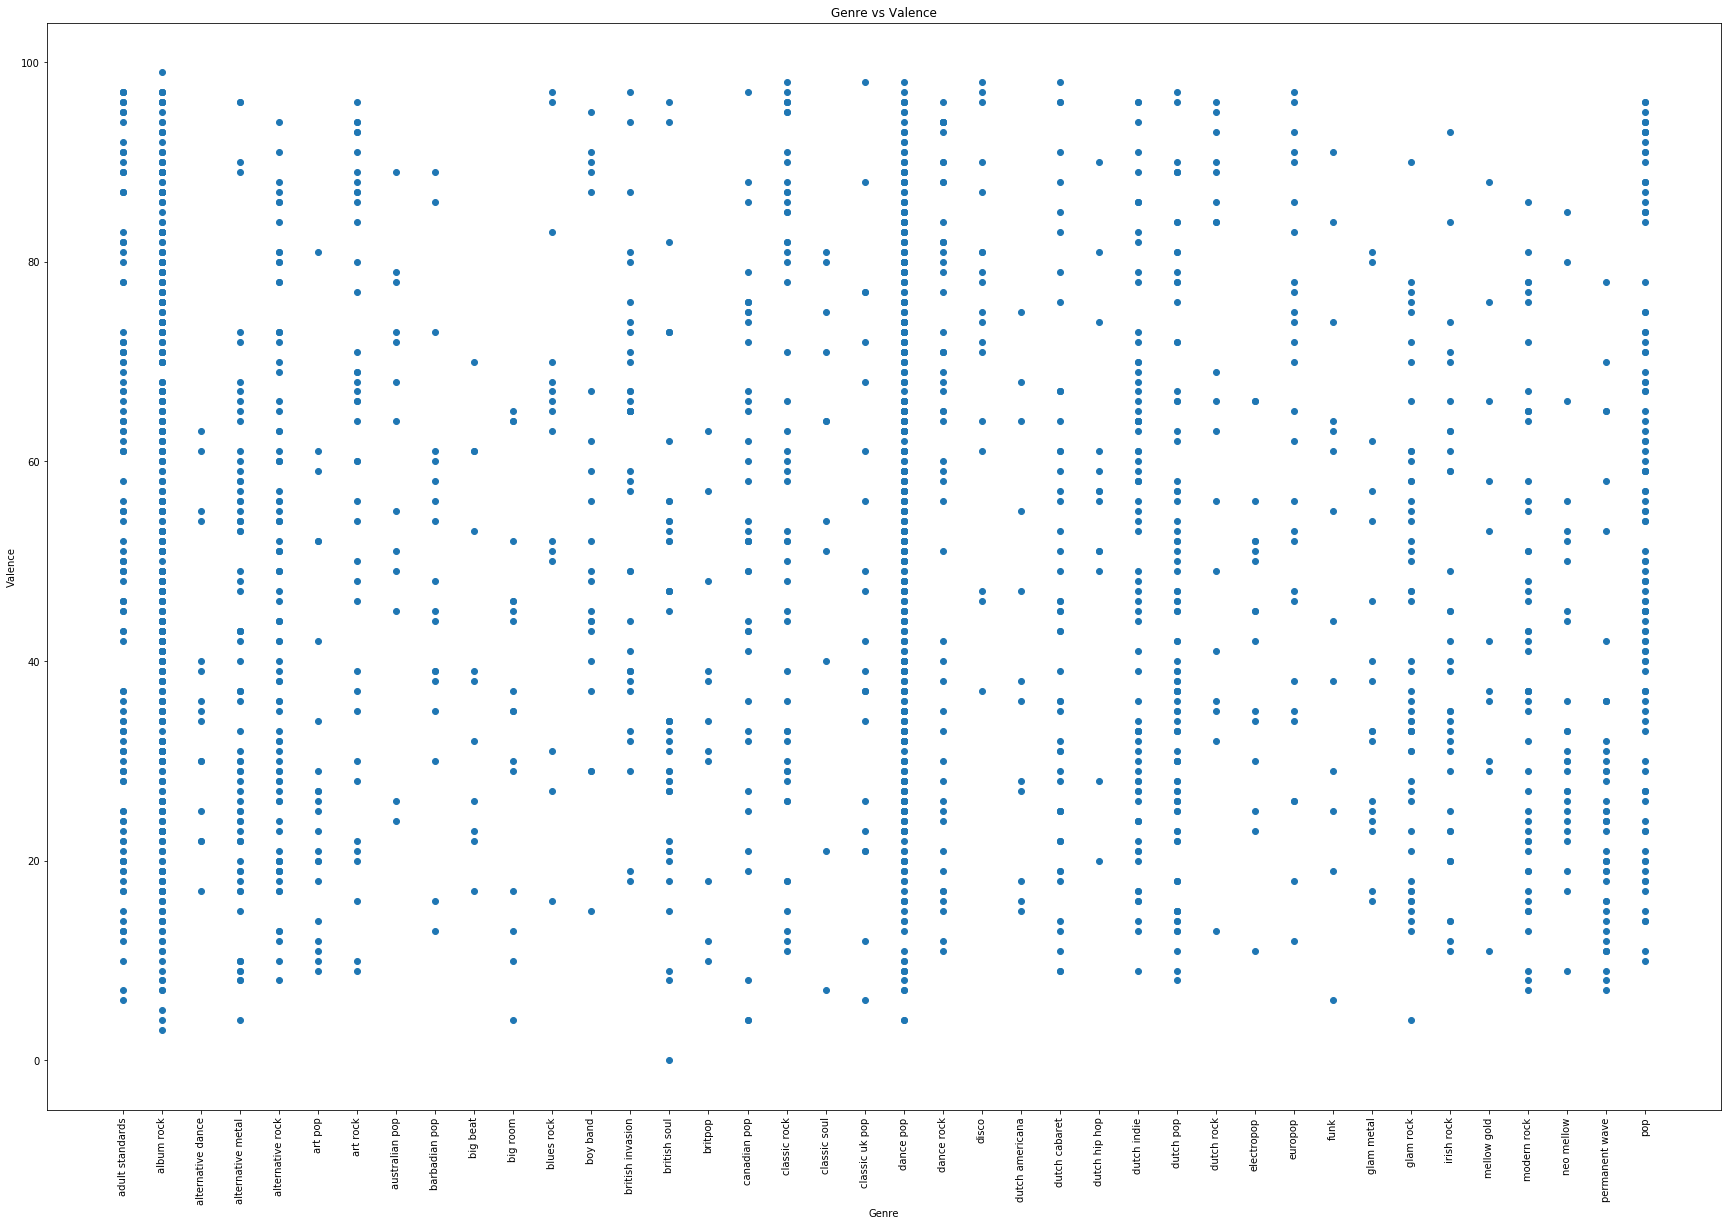

In [22]:
#Graphing the Genres vs The Valence Atribute
fig = plt.gcf()
fig =fig.set_size_inches(30, 20)
plt.scatter(merged_df['Genre'], merged_df['Valence'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.title('Genre vs Valence')

**COMMENT**
At the moment, we can see that no distinct parameter of a song, when plotted against genre, do not form distinct clusters or display a strong relationship, which supports our theory that no one parameter of a song can accurately categorize it into a distinct genre, and instead suggests that we will need to use a multi-dimensional model with multiple features for classification.

<br>
We will determine the mean value for Valenceof all the songs in the dataset in order to have a threshold for future predictions and to support our future hypothesis.

In [23]:
mean_valence = merged_df['Valence'].mean()
print("The mean value for Valence is:")
print(mean_valence)

The mean value for Valence is:
50.41515426497278


Text(0.5, 1.0, 'BPM vs. Popularity')

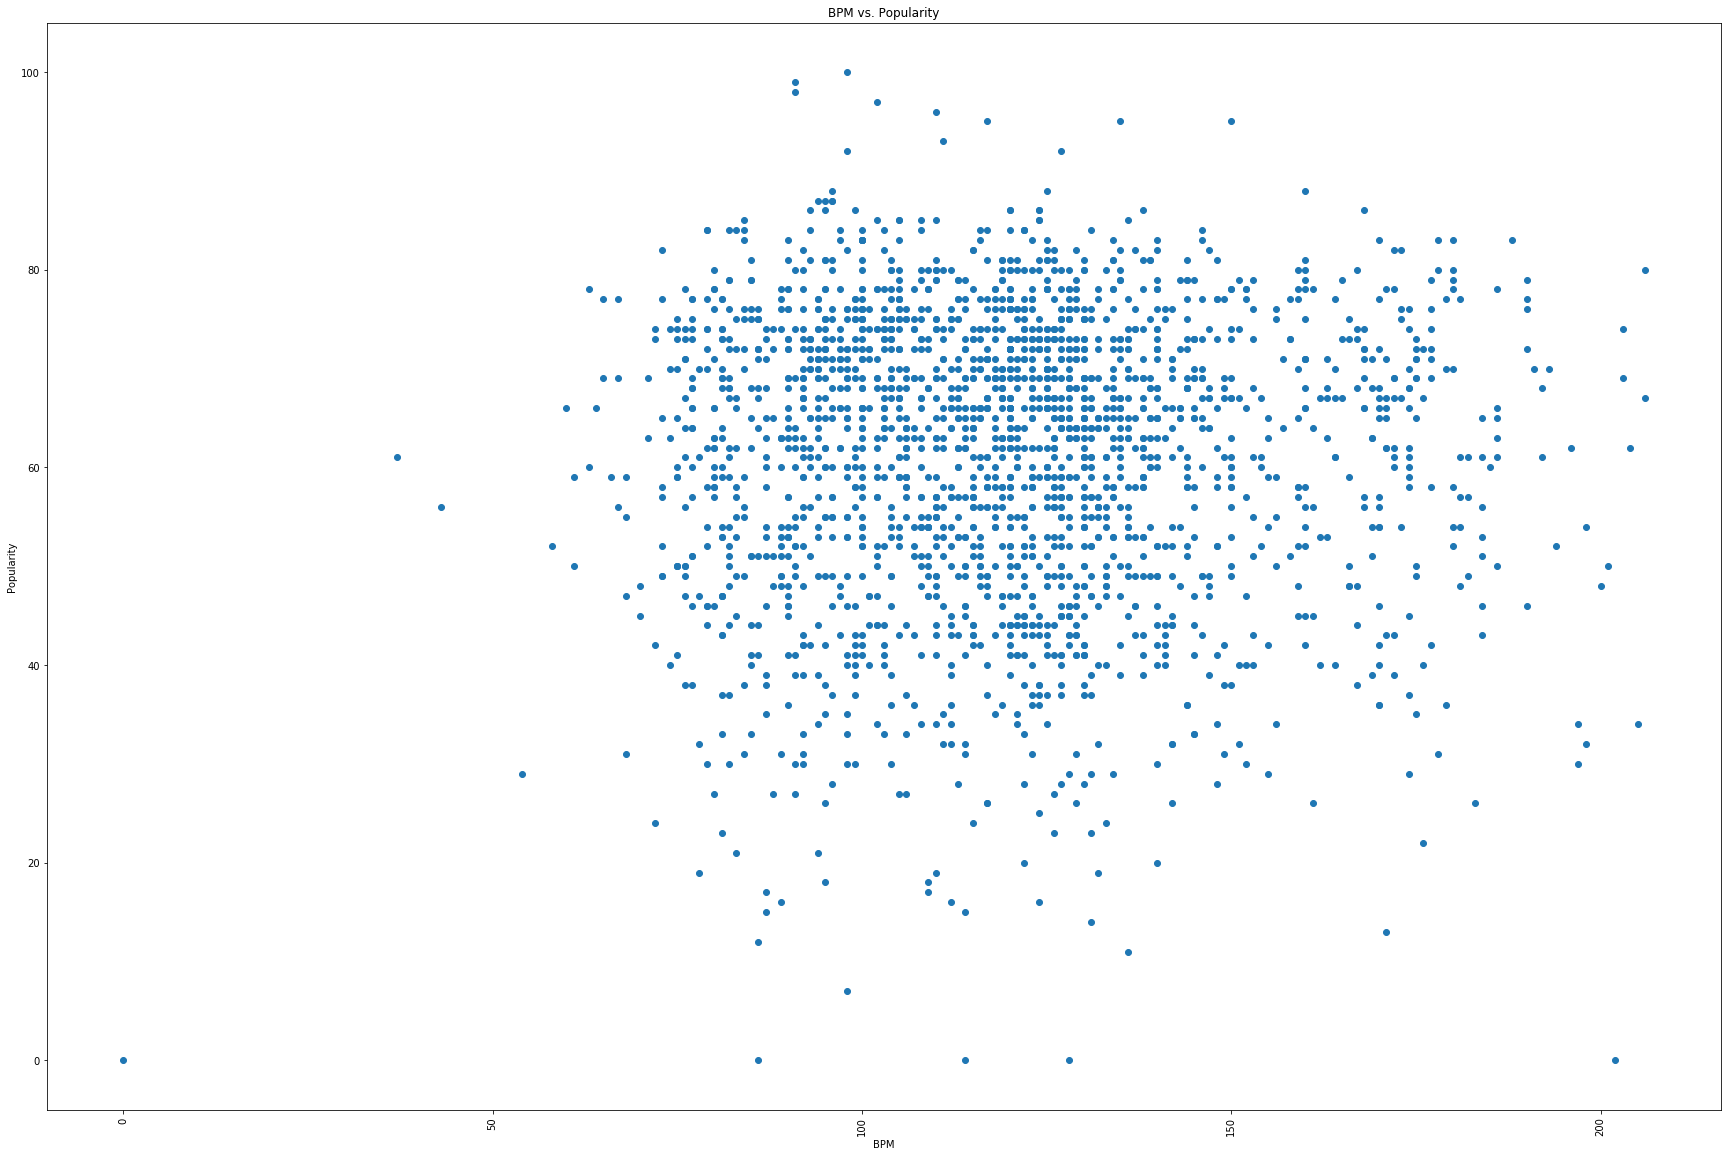

In [24]:
fig = plt.gcf()
fig =fig.set_size_inches(30, 20)
plt.scatter(merged_df['BPM'], merged_df['Popularity'])
plt.xticks(rotation=90)
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.title('BPM vs. Popularity')

Because there are many parameters pairs to evaluate to develop a hypothesis, we can start looking at correlations. For this, we need a heat map. The lighter the color of the squared between two parameters, the greater the correlation. We will ignore all the white squares since those will only show the correlation of a parameter with itself.

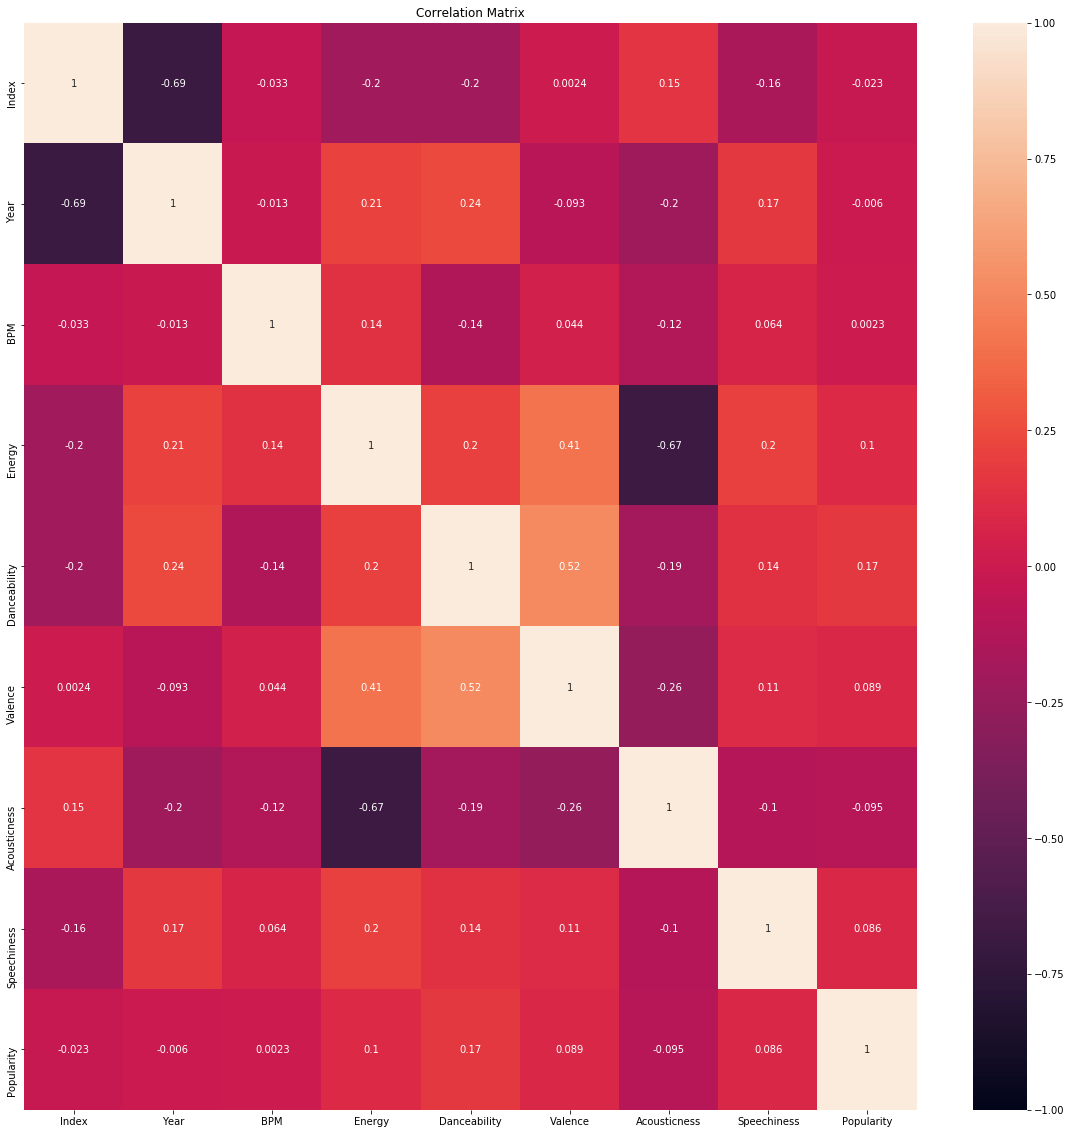

In [25]:
corr_df = merged_df.corr()
_ = plt.figure(figsize=(20,20))
_ = sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1)
_ = plt.title("Correlation Matrix")

We will repeat the process and remove three parameters that we are not interested in finding its correlation.

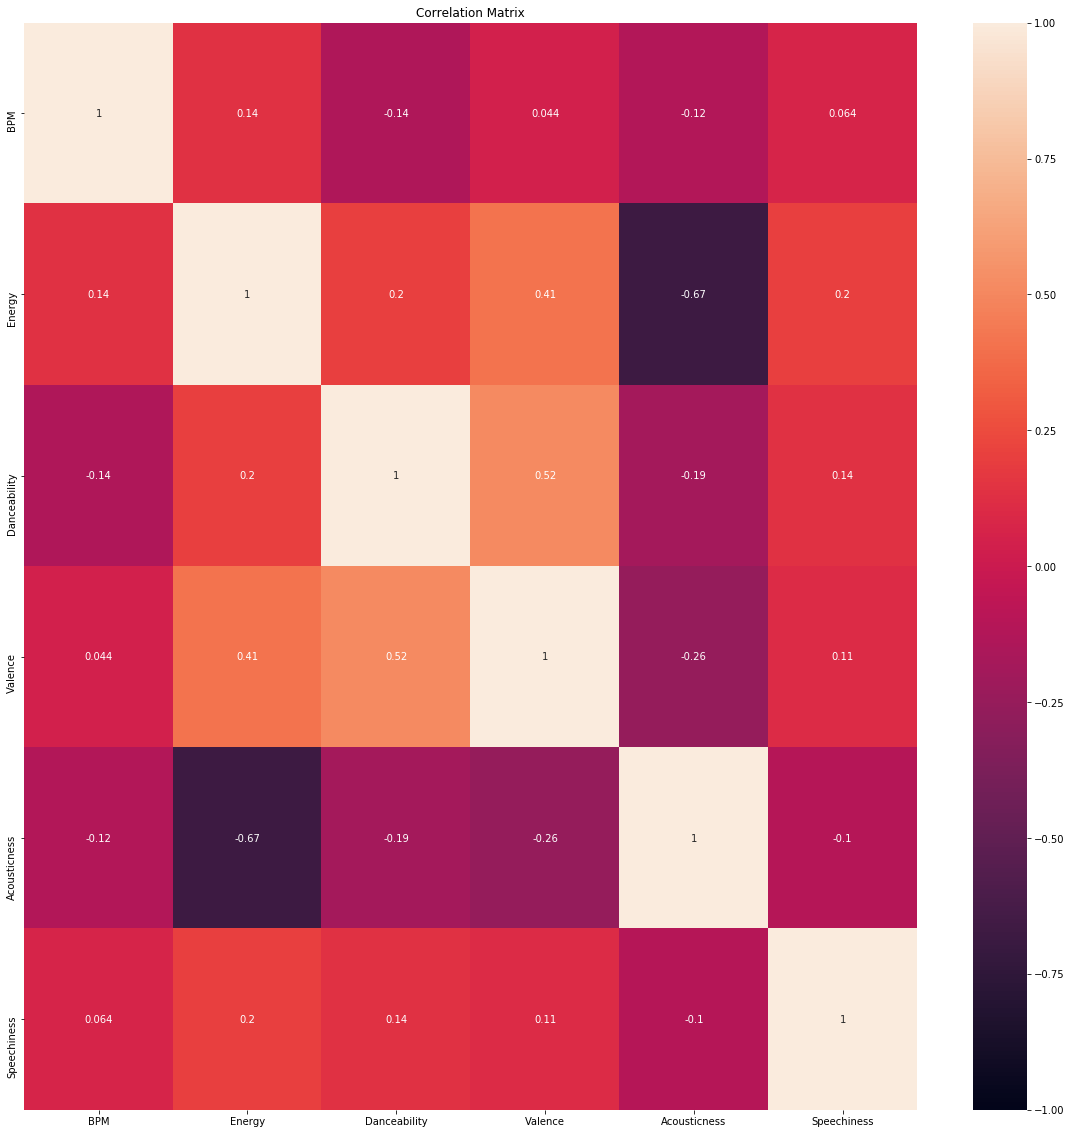

In [26]:
temp_df = merged_df.drop(['Popularity','Year', 'Index'], axis=1)
corr_df = temp_df.corr()
_ = plt.figure(figsize=(20,20))
_ = sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1)
_ = plt.title("Correlation Matrix")

The highest possible correlations are the following:
- Danceability with Valence
- Energy with Valence
- Speechness with Energy
- Danceability with Popularity 

#### **Part 4. Hypothesis Testing, and ML**


We predict that we will be able to classify different songs by genre through some, most or all of their individual parameters. Therefore, we will  be using random forests and multiple linear regression as our classification models to test out combinations of the different attributes on Genre.
<br>
We will separate the datasets using certain parts for training and the remaining parts for testing and use cross-validation to measure our success rate to determine whether our classifiers work. 
<br>
Random forests refers to a collection of decision trees that come together to form predictions. In choosing random forest, we hope to pull together unseen correlations among the various attributes in the table to generate an effective classifier. If you wish to learn more about random forests, refer to the links at the bottom of the notebook.
<br>
Moreover, we will use Multiple Linear Regression  to find if any pair of correlated parameters can help us determine the probability of a song to become popular


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

genres_dict = {
    'adult standards' : 1,
    'album rock': 2,
    'alternative dance' : 3,
    'alternative metal' : 4,
    'alternative rock': 5,
    'art pop': 6,
    'art rock': 7,
    'australian pop': 8,
    'barbadian pop': 9,
    'big beat' : 10,
    'big room': 11,
    'blues rock' : 12,
    'boy band' : 13,
    'british invasion' : 14,
    'british soul' : 15,
    'britpop': 16,
    'canadian pop': 17,
    'classic rock' : 18,
    'classic soul' : 19,
    'classic uk pop' : 20,
    'dance pop' : 21,
    'dance rock' : 22,
    'disco': 23,
    'dutch americana' : 24,
    'dutch cabaret' : 25,
    'dutch hip hop' : 26,
    'dutch indie' : 27 ,
    'dutch pop' : 28,
    'dutch rock' : 29,
    'electropop' : 30,
    'europop' : 31,
    'funk' : 32,
    'glam metal' : 33,
    'glam rock' : 34,
    'irish rock' : 35,
    'mellow gold' : 36,
    'modern rock' : 37,
    'neo mellow' : 38,
    'permanent wave': 39,
    'pop' : 40
    }

for index, row in merged_df.iterrows():
    merged_df.at[index, 'genre_id'] = int(genres_dict[row['Genre']])

merged_df

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Valence,Length,Acousticness,Speechiness,Popularity,genre_id
1993,1994,Blueberry Hill,Fats Domino,adult standards,1959,133,50,49,83,148,74,3,56,1.0
1950,1951,Suspicious Minds,Elvis Presley,adult standards,1969,117,38,49,71,261,4,3,72,1.0
1938,1939,Words,Bee Gees,adult standards,1968,80,29,26,25,198,14,3,59,1.0
1939,1940,Massachussetts,Bee Gees,adult standards,1968,102,44,48,42,148,1,3,57,1.0
1905,1906,"He Ain't Heavy, He's My Brother",The Hollies,adult standards,1967,76,44,31,22,258,41,3,50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,54,257,6,3,74,40.0
599,600,Cross Me,Ed Sheeran,pop,2019,95,79,75,61,206,21,12,75,40.0
11,12,Marry You,Bruno Mars,pop,2010,145,83,62,48,230,33,4,73,40.0
1942,1943,MacArthur Park,Richard Harris,pop,1968,170,34,25,37,450,80,3,36,40.0


In [28]:
X = merged_df.loc[:, ['BPM' , 'Energy' , 'Danceability', 'Valence', 'Acousticness', 'Speechiness']].to_numpy()
Y = merged_df.loc[:, ['genre_id']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

x_train, y_train

(array([[126,  31,  45,  37,  98,   3],
        [120,  26,  42,  33,  92,   3],
        [ 92,  69,  57,  32,   8,  12],
        ...,
        [128,  98,  67,  45,   1,   3],
        [100,  29,  40,  34,  94,   3],
        [124,  53,  74,  13,   0,   4]]),
 array([[34.],
        [38.],
        [21.],
        ...,
        [11.],
        [ 1.],
        [28.]]))

/home/karen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/karen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


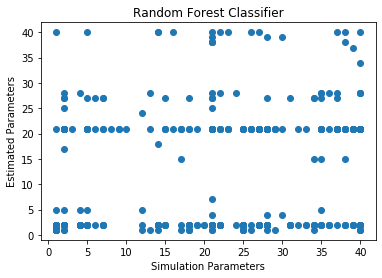

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

ran_clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

n_clf = neighbors.KNeighborsClassifier(15, weights = 'uniform').fit(x_train,y_train)

predictions = n_clf.predict(x_test)

plt.scatter(y_test, predictions)
plt.xlabel("Simulation Parameters")
plt.ylabel("Estimated Parameters")
plt.title("Random Forest Classifier")
plt.show()

In [30]:
count1 = 0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]:
        count1+=1
        
print("\tThe Random Forests Algorithm had a precision of:" , round(float(count1/len(y_test))*100, 2), "%.")

	The Random Forests Algorithm had a precision of: 24.94 %.


In [31]:
#Without popularity
X = merged_df.loc[:, ['BPM' , 'Energy', 'Danceability' , 'Acousticness', 'Speechiness']].to_numpy()
Y = merged_df.loc[:, ['genre_id']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

x_train, y_train

(array([[129,  39,  59,  13,   6],
        [126,  72,  49,   1,   4],
        [ 99,  56,  45,  24,   3],
        ...,
        [ 90,  52,  63,  11,   3],
        [ 93,  71,  68,   1,   8],
        [ 92,  64,  56,  49,   3]]),
 array([[21.],
        [35.],
        [20.],
        ...,
        [21.],
        [36.],
        [25.]]))

/home/karen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


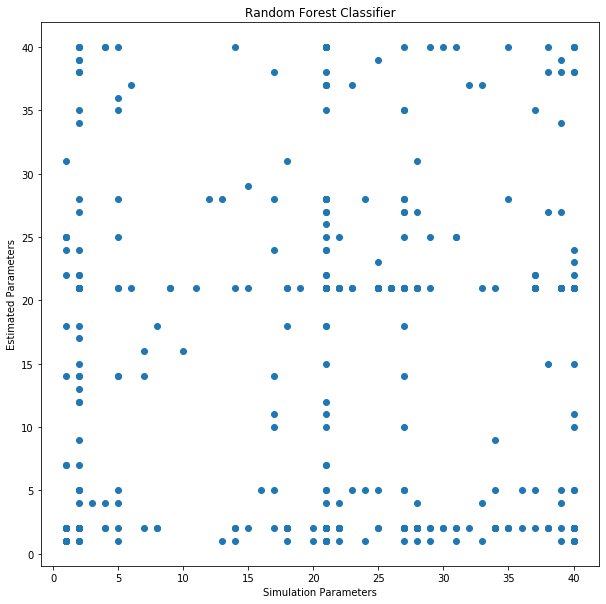

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

ran_clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

predictions = ran_clf.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel("Simulation Parameters")
plt.ylabel("Estimated Parameters")
plt.title("Random Forest Classifier")
plt.show()

/home/karen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


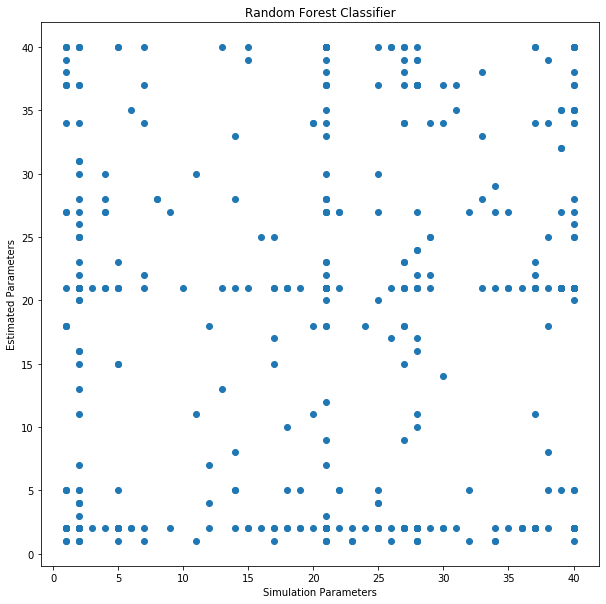

In [33]:
#Without popularity
X = merged_df.loc[:, ['BPM' , 'Valence']].to_numpy()
Y = merged_df.loc[:, ['genre_id']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
#x_train, y_train

ran_clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

predictions = ran_clf.predict(x_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel("Simulation Parameters")
plt.ylabel("Estimated Parameters")
plt.title("Random Forest Classifier")
plt.show()

/home/karen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


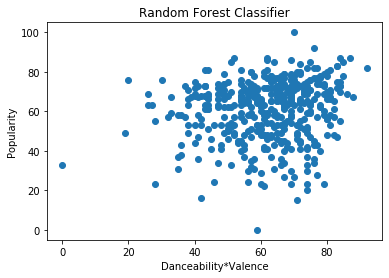

In [34]:
#Without popularity
X = merged_df.loc[:, ['Danceability' , 'Valence']].to_numpy()
Y = merged_df.loc[:, ['Popularity']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
#x_train, y_train

ran_clf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

predictions = ran_clf.predict(x_test)

plt.scatter(y_test, predictions)

plt.xlabel("Danceability*Valence")
plt.ylabel("Popularity")
plt.title("Random Forest Classifier")



regression_line = linear_model.LinearRegression()

#Create linear regression
regfit = regression_line.fit(x_test, y_test)
coef = regfit.coef_

intercept = regfit.intercept_


plt.show()


##### **Multiple Linear Regression Model:**

After analyzing the data above, the next step is to test our results. We will make a linear regression model to see how all the paired correlations from the heatmap can relate to the probability of a song being in the Top Billboard Charts using the Multiple Linear Regression Model.
<br>
The first pair we will test is Danceability vs Valence. For that, we will first create a regression object and plot the two parameters.

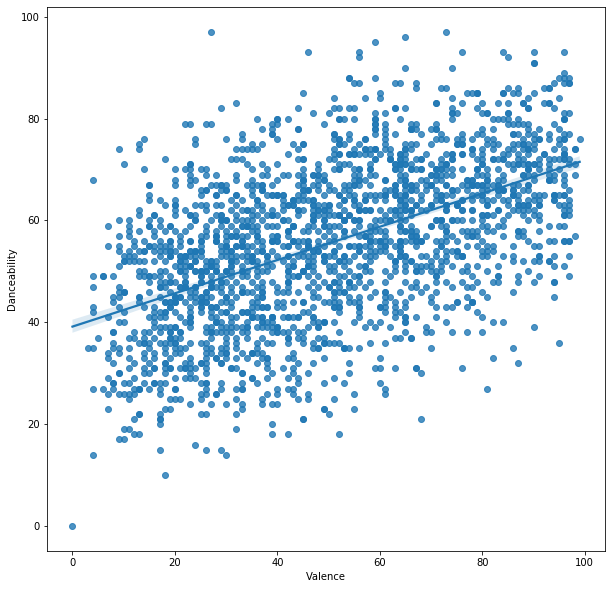

In [35]:
#Take the necessary information for the regression object
plt.figure(figsize=(10,10))

sns.regplot(x= merged_df.Valence, y=merged_df.Danceability)

The graph looks messy since it has many points, but in general we can see that the points follow the trend, Meaning it found the best-fitting straight line through the points that help us predict the score on Y (Danceability) for each possible value of X (Valence) 
<br><br>
We will continue with the Ordinary Least Squares Method (OLS) to run an F-Test and check the statistical significance (or the p-stat values). For this, we decided to use our hypothesis to determine the possible formula used at the OLS. There are a few strong points we need to cover first. We know that for a song to be on the Billboard, it needs to have a significant score in the "Popularity" parameter. So our formula should determine that our X and Y parameters will give us a significant p-statistic for our Popularity parameter. Therefore, our first equation relates Popularity to the sum of Danceability plus Valence. We expect that the higher the Danceability and the Valence score, the higher the Popularity and hence the higher the chanCe for the song to be in the Billboard Top Songs.

In [36]:
result_1 = sm.ols(formula="Popularity ~ Danceability + Valence", data = merged_df).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           9.47e-15
Time:                        15:28:16   Log-Likelihood:                -8991.5
No. Observations:                2204   AIC:                         1.799e+04
Df Residuals:                    2201   BIC:                         1.801e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.5102      1.140     46.074      0.000      50.275      54.745
Danceability     0.1587      0.023      6.907      0.000       0.114       0.204
Valence          0.0009      0.015      0.060      0.952      -0.028       0.029
==============================================================================
Omnibus:                      191.778   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.916
Skew:                          -0.749   Prob(JB):                     1.46e-54
Kurtosis:                       3.677   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>


**Interpretation:**
<br>
The F-Statistic and the Prob(F-statistic) look good, this tells us that our Null Hypothesis is rejected. We can also see that Danceability and Valence have a statistical significance becaUse the P values (P>[t]) have a big effect with 0.952
Therefore, we determined that Danceability and Valence can potentially determine a song's popularity. However, we will still need to take into account other factors such as the Genre.

<br>
The second pair we will test is Energy vs Valence. And we will start again by creating the regression object and plotting it.

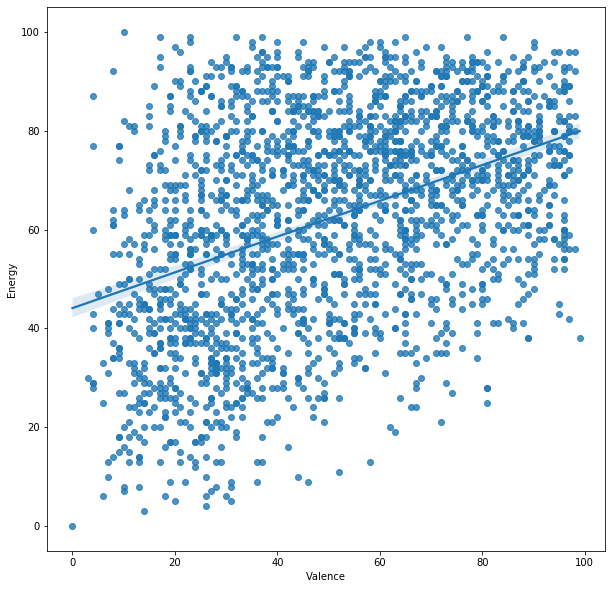

In [37]:
#Take the necessary information for the regression object
plt.figure(figsize=(10,10))
sns.regplot(x= merged_df.Valence, y=merged_df.Energy)

The graph is slightly similar to the first one because we kept "Valence" as our X parameter. We can see how this is the best-fitting model for the points 
<br><br>
We will continue with the Ordinary Least Squares Method (OLS) to run an F-Test and check the statistical significance (or the p-stat values). We decided to use our hypothesis to determine the second possible formula used at the OLS. In this case, we will test if the Popularity parameter is related to the sumation of Energy and Valence

In [38]:
result_2 = sm.ols(formula="Popularity ~ Energy + Valence", data = merged_df).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     14.32
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           6.60e-07
Time:                        15:28:16   Log-Likelihood:                -9009.5
No. Observations:                2204   AIC:                         1.803e+04
Df Residuals:                    2201   BIC:                         1.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.4238      0.987     57.163      0.000      54.488      58.359
Energy         0.0522      0.016      3.332      0.001       0.021       0.083
Valence        0.0338      0.014      2.452      0.014       0.007       0.061
==============================================================================
Omnibus:                      184.776   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.514
Skew:                          -0.726   Prob(JB):                     1.61e-52
Kurtosis:                       3.700   Cond. No.                         272.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

**Interpretation:**
<br>
Interpretation:
The F-Statistic and the Prob(F-statistic) look good, so our Null Hypothesis is rejected. However, we can see that Energy and Valence do not have statistical significance because the P values (P>[t]) do not have a big effect in the intercept, energy, or valence. The respective P-values were 0.000, 0.001, and 0.014. Therefore, we determined that Energy and Valence do not help determine (by itself) the possibility of a song being popular. Even though there was a correlation between them. We predict that we would need other non-quantitative factors to see a better correlation between these two parameters, such as Genre.

<br>
The third pair we will test is Energy vs Speechiness. And we will start again by creating the regression object and plotting it.

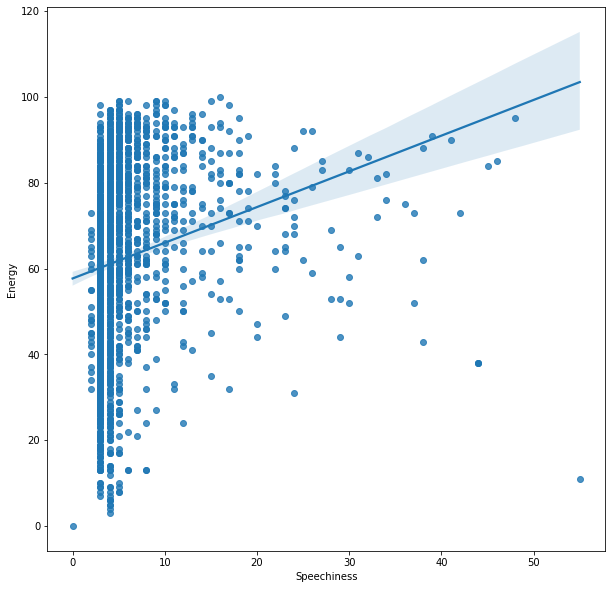

In [39]:
#Take the necessary information for the regression object
plt.figure(figsize=(10,10))
sns.regplot(x= merged_df.Speechiness, y=merged_df.Energy)

The graph looks different than the ones before. We can see the presence of a cluster when the Speechiness value is between 0 and 20.
<br><br>
We will continue with the Ordinary Least Squares Method (OLS) to run an F-Test and check the statistical significance (or the p-stat values). We decided to use our hypothesis to determine the third possible formula used at the OLS. In this case, we will test if the Popularity parameter is related to the summation of Energy and Speechiness

In [40]:
result_3 = sm.ols(formula="Popularity ~ Energy + Speechiness", data = merged_df).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     16.42
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           8.35e-08
Time:                        15:28:17   Log-Likelihood:                -9007.5
No. Observations:                2204   AIC:                         1.802e+04
Df Residuals:                    2201   BIC:                         1.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.6591      0.953     59.427      0.000      54.789      58.529
Energy          0.0586      0.015      4.022      0.000       0.030       0.087
Speechiness     0.1916      0.060      3.188      0.001       0.074       0.309
==============================================================================
Omnibus:                      192.752   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.312
Skew:                          -0.741   Prob(JB):                     1.63e-55
Kurtosis:                       3.742   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

**Interpretation:**
<br>
The F-Statistic and the Prob(F-statistic) look good still, so our Null Hypothesis is rejected. However, the statistical significance is extremely low since the P values (P>[t]) do not have a big effect on the intercept, energy, or speechiness. The respective P-values were 0.000, 0.000, and 0.001. Therefore, we determined that Energy and Valence do not help determine (by itself) the possibility of a song being popular. After comparing this result with the graph we understand that the cluster meant that a song that does not have many words on it would have a greater chance to be popular no matter the energy, but if the song has more words then it would need to be more energetic in order to be popular

<br>
The fourth pair we will test is Danceability vs Popularity. And we will start again by creating the regression object and plotting it.

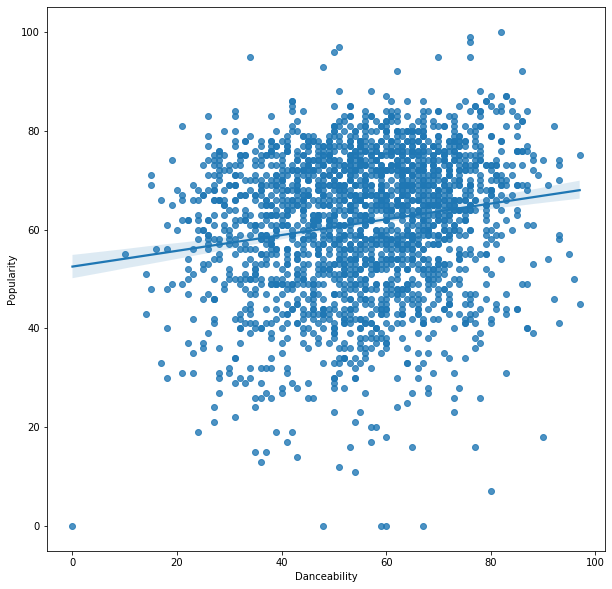

In [41]:
#Take the necessary information for the regression object
plt.figure(figsize=(10,10))
sns.regplot(x= merged_df.Danceability, y=merged_df.Popularity)

The graph looks slightly different than the first one. We can see the presence of a cluster when the Danceability value is between 20 and 80.
<br>
We will continue with the Ordinary Least Squares Method (OLS) to run an F-Test and check the statistical significance (or the p-stat values). For this, we decided to use our hypothesis to determine the fourth possible formula used at the OLS. In this case, we will test if the Popularity parameter is related to Danceability.

In [42]:
result_4 = sm.ols(formula="Popularity ~ Danceability", data = merged_df).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     65.56
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           9.21e-16
Time:                        15:28:18   Log-Likelihood:                -8991.5
No. Observations:                2204   AIC:                         1.799e+04
Df Residuals:                    2202   BIC:                         1.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.5147      1.137     46.190      0.000      50.285      54.744
Danceability     0.1594      0.020      8.097      0.000       0.121       0.198
==============================================================================
Omnibus:                      191.825   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.983
Skew:                          -0.749   Prob(JB):                     1.42e-54
Kurtosis:                       3.676   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

**Interpretation:**
<br>
The F-Statistic and the Prob(F-statistic) look good still, so our Null Hypothesis is rejected. However, the statistical significance is very low since the P values (P>[t]) do not have a significant effect on the intercept or Danceability. Therefore, we determined that Popularity is not always related to Danceability. We expect that the correlation from the heatmap was high for more "Happy" Genres.

#### **Conclusion and Further Exploration**

Based on our observations throughout the analysis, we can safely suggest using our scatter plots, the random forest, and multiple linear regression; we were able to see that each attribute would vary significantly for each Genre. By combining different attributes, we saw that it could create more defined clusters. Despite that, we could not find a more substantial relationship that will help us determine the Genre of a song and its popularity without having some extra attributes in our dataset. We were unable to come out with a new insight. However, our analysis support the idea that there are some correlations between the attributes of songs that can be further explored to predict other parameters such as the Genre.
<br><br>
Our tutorial is an example of how we can use data science to help the audience predict the possibility of an event even when there seems to be more qualitative data than quantitative in the dataset. Regardless of the outcome, this tutorial demonstrated the data lifecycle. We encourage the readers to spend more time to play with this data set and develop a new approach. We hope this tutorial was worth the read.

#### **Extra Resources**

If you are new to Data Science, we recomend checking out the following resources:
- Pandas Cheat Sheet: https://www.datacamp.com/community/blog/python-pandas-cheat-sheet
- The Complete Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/
- The Complete Documentation on Visualization using Matplotlib: https://matplotlib.org/
- Understanding the  Ordinary Least Squares Method summary: http://web.mit.edu/course/17/17.846/OldFiles/www/Readout.html
- Random forest https://towardsdatascience.com/understanding-random-forest-58381e0602d2